# Prep

In [1]:
import os
import numpy as np

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset
import torch.nn.functional as F
from torch.optim.lr_scheduler import LinearLR
import torchaudio.transforms

In [3]:
import models
from experiments import perform_test,evaluate_2_models
from data_preparation import gen_files
from ensemble import evaluate_ensemble, load_models, evaluate_ensemble_test

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(DEVICE)

cuda


In [6]:
# path to train dir

train_dir = r"C:\Users\rafci\Desktop\tensorflow-speech-recognition-challenge\train"
if not os.path.exists(train_dir):
    train_dir = r"C:\Users\jakub\Desktop\PD\sem10\deep\tensorflow-speech-recognition-challenge\train"

In [7]:
# run once to generate dataset files

# gen_files(train_dir)

In [8]:
classes = os.listdir(train_dir+'/audio/')

def convert_list_dict(lst):
    res_dct = {i: val for i, val in enumerate(lst)}
    return res_dct
         
classes_index = convert_list_dict(classes)
INPUT_SHAPE = (85, 122)
CLASSES_COUNT = len(classes)

### params

In [9]:
num_epochs = 30
batch_size = 64
lr = 0.005
weight_decay = 1e-8
masking_param = 40

In [10]:
# trans params
num_heads=5
ffn_dim=256
num_layers = 4
dropout = 0

# inception params
num_filters = 32
use_residual = True
use_bottleneck = True
depth = 10
kernel_size = 41
bottleneck_size = 32 * 4

### data

In [11]:
# reading data from generated files 
X_train = np.load("data/X_train.npy")
y_train = np.load("data/y_train.npy")

X_val = np.load("data/X_val.npy")
y_val = np.load("data/y_val.npy")

X_train = X_train.reshape((-1, X_train.shape[1], X_train.shape[2]))
X_val = X_val.reshape((-1, X_val.shape[1], X_val.shape[2]))



In [12]:
# creating datasets
y_train = torch.tensor(y_train).long()
y_val = torch.tensor(y_val).long()
X_train = torch.tensor(X_train)
X_val = torch.tensor(X_val)

y_train = F.one_hot(y_train, num_classes = CLASSES_COUNT)

train_data = TensorDataset(X_train.float().transpose(2, 1), y_train.float())
valid_data = TensorDataset(X_val.float().transpose(2, 1), y_val.float())

# Tests

## Model tests

### Inception test

In [11]:
model = models.InceptionClassifier(INPUT_SHAPE, CLASSES_COUNT, num_filters, use_residual, use_bottleneck, depth, kernel_size, bottleneck_size)

model.to(DEVICE)
if DEVICE == torch.device('cuda'):
    model = model.cuda()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = lr, weight_decay = weight_decay)
scheduler = LinearLR(optimizer = optimizer, start_factor = 1.0, end_factor = 0.01, total_iters = num_epochs)

Epoch [1/30], Train loss: 0.0016
Test accuracy: 0.8473461032314666
Epoch [2/30], Train loss: 0.0011
Test accuracy: 0.8820002924404152
Epoch [3/30], Train loss: 0.0008
Test accuracy: 0.9210410878783448
Epoch [4/30], Train loss: 0.0008
Test accuracy: 0.930984061997368
Epoch [5/30], Train loss: 0.0008
Test accuracy: 0.9393186138324316
Epoch [6/30], Train loss: 0.0008
Test accuracy: 0.9239654920309986
Epoch [7/30], Train loss: 0.0010
Test accuracy: 0.9472145050445971
Epoch [8/30], Train loss: 0.0003
Test accuracy: 0.9450212019301067
Epoch [9/30], Train loss: 0.0004
Test accuracy: 0.9469220646293318
Epoch [10/30], Train loss: 0.0002
Test accuracy: 0.9466296242140664
Epoch [11/30], Train loss: 0.0002
Test accuracy: 0.9480918262903933
Epoch [12/30], Train loss: 0.0002
Test accuracy: 0.9577423599941511
Epoch [13/30], Train loss: 0.0001
Test accuracy: 0.9577423599941511
Epoch [14/30], Train loss: 0.0005
Test accuracy: 0.9551103962567626
Epoch [15/30], Train loss: 0.0004
Test accuracy: 0.9589121

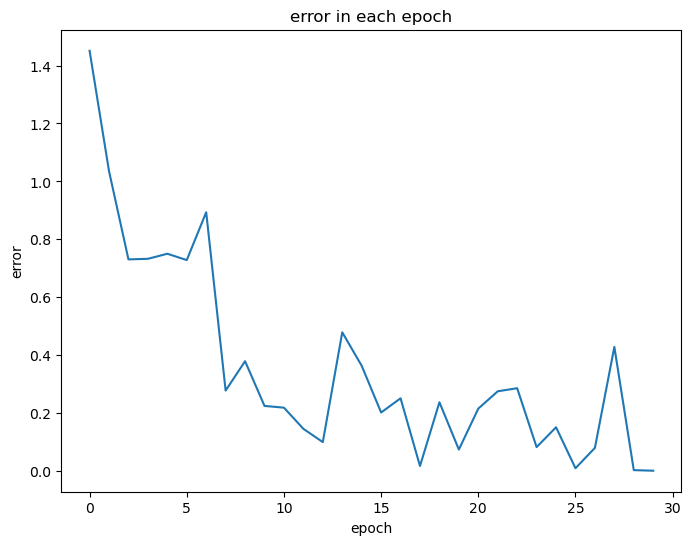

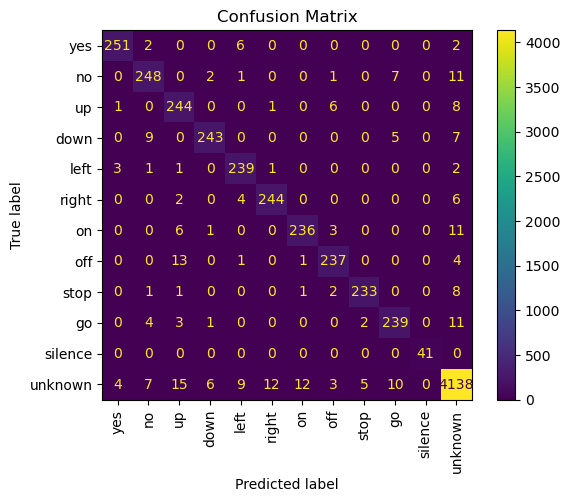

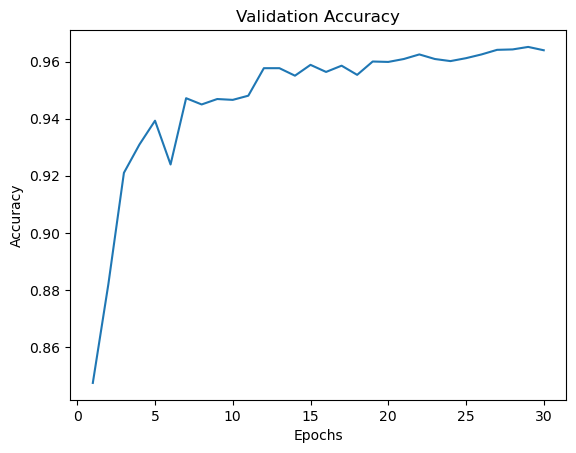

In [12]:
model = perform_test(model = model, 
                     train_data = train_data, 
                     test_data = valid_data, 
                     batch_size = batch_size, 
                     num_epochs = num_epochs, 
                     criterion = criterion, 
                     optimizer = optimizer, 
                     scheduler = scheduler,
                     device = DEVICE,
                     all_classes=classes_index,
                     trans_mode = False)

### Mod Inception test

In [11]:
model = models.InceptionClassifierMod(INPUT_SHAPE, CLASSES_COUNT, num_filters, use_residual, use_bottleneck, depth, kernel_size, bottleneck_size)

model.to(DEVICE)
if DEVICE == torch.device('cuda'):
    model = model.cuda()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = lr, weight_decay = weight_decay)
scheduler = LinearLR(optimizer = optimizer, start_factor = 1.0, end_factor = 0.01, total_iters = num_epochs)

Epoch [1/30], Train loss: 0.0017
Test accuracy: 0.8686942535458401
Epoch [2/30], Train loss: 0.0014
Test accuracy: 0.8995467173563386
Epoch [3/30], Train loss: 0.0010
Test accuracy: 0.8991080567334405
Epoch [4/30], Train loss: 0.0009
Test accuracy: 0.9352244480187162
Epoch [5/30], Train loss: 0.0009
Test accuracy: 0.9451674221377394
Epoch [6/30], Train loss: 0.0004
Test accuracy: 0.9382950723790028
Epoch [7/30], Train loss: 0.0008
Test accuracy: 0.945898523175903
Epoch [8/30], Train loss: 0.0003
Test accuracy: 0.9439976604766779
Epoch [9/30], Train loss: 0.0003
Test accuracy: 0.9558414972949262
Epoch [10/30], Train loss: 0.0002
Test accuracy: 0.9580348004094166
Epoch [11/30], Train loss: 0.0005
Test accuracy: 0.9472145050445971
Epoch [12/30], Train loss: 0.0001
Test accuracy: 0.9578885802017839
Epoch [13/30], Train loss: 0.0003
Test accuracy: 0.9521859921041088
Epoch [14/30], Train loss: 0.0003
Test accuracy: 0.9577423599941511
Epoch [15/30], Train loss: 0.0002
Test accuracy: 0.9580348

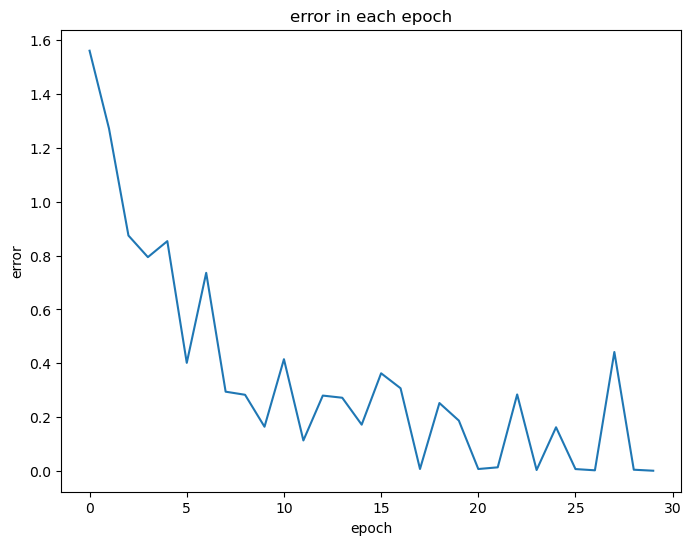

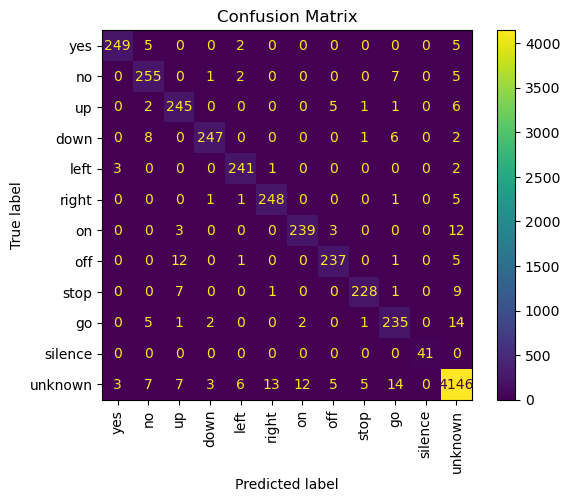

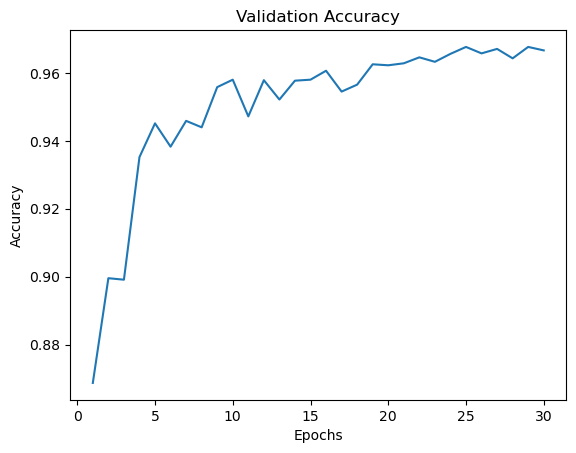

In [12]:
model = perform_test(model = model, 
                     train_data = train_data, 
                     test_data = valid_data, 
                     batch_size = batch_size, 
                     num_epochs = num_epochs, 
                     criterion = criterion, 
                     optimizer = optimizer, 
                     scheduler = scheduler,
                     device = DEVICE,
                     all_classes=classes_index,
                     trans_mode = False)

### Conformer test

In [13]:
model = models.ConformerClassifier(num_classes = 31, input_length = INPUT_SHAPE[1], input_dim = INPUT_SHAPE[0], num_heads = num_heads, ffn_dim = ffn_dim, num_layers = num_layers, dropout = dropout)

model.to(DEVICE)
if DEVICE == torch.device('cuda'):
    model = model.cuda()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = lr, weight_decay = weight_decay)
scheduler = LinearLR(optimizer = optimizer, start_factor = 1.0, end_factor = 0.01, total_iters = num_epochs)

Epoch [1/30], Train loss: 0.0073
Test accuracy: 0.4212604181897938
Epoch [2/30], Train loss: 0.0073
Test accuracy: 0.5032899546717357
Epoch [3/30], Train loss: 0.0075
Test accuracy: 0.0394794560608276
Epoch [4/30], Train loss: 0.0072
Test accuracy: 0.6084222839596433
Epoch [5/30], Train loss: 0.0061
Test accuracy: 0.07764293025296096
Epoch [6/30], Train loss: 0.0034
Test accuracy: 0.45766924989033486
Epoch [7/30], Train loss: 0.0022
Test accuracy: 0.6288931130282205
Epoch [8/30], Train loss: 0.0023
Test accuracy: 0.745576838719111
Epoch [9/30], Train loss: 0.0011
Test accuracy: 0.7675098698640153
Epoch [10/30], Train loss: 0.0012
Test accuracy: 0.808305307793537
Epoch [11/30], Train loss: 0.0008
Test accuracy: 0.7640005848808306
Epoch [12/30], Train loss: 0.0009
Test accuracy: 0.8858020178388654
Epoch [13/30], Train loss: 0.0003
Test accuracy: 0.8591899400497148
Epoch [14/30], Train loss: 0.0018
Test accuracy: 0.8878491007457231
Epoch [15/30], Train loss: 0.0008
Test accuracy: 0.879222

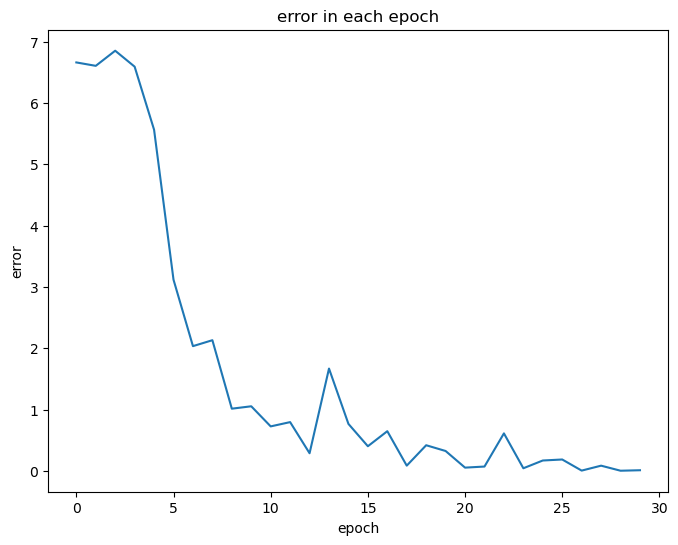

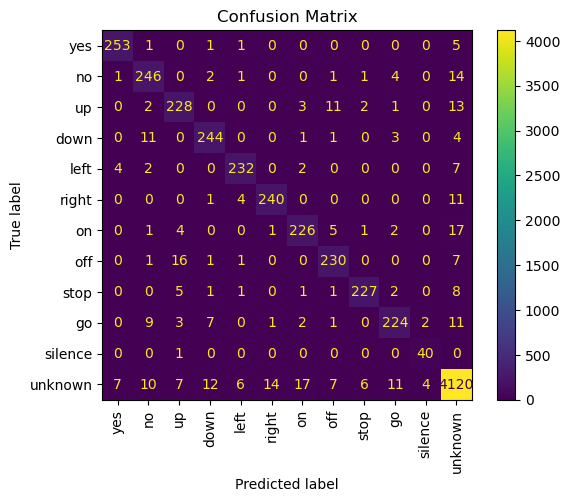

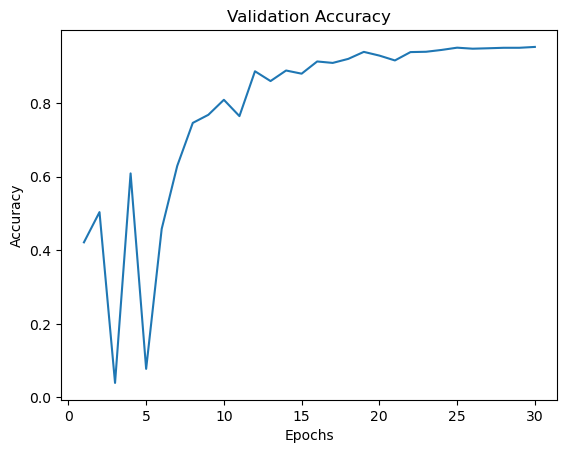

In [14]:
model = perform_test(model = model, 
                     train_data = train_data, 
                     test_data = valid_data, 
                     batch_size = batch_size, 
                     num_epochs = num_epochs, 
                     criterion = criterion, 
                     optimizer = optimizer, 
                     scheduler = scheduler,
                     device = DEVICE,
                     all_classes = classes_index,
                     trans_mode = True)

### Emformer test

In [27]:
model = models.EmformerClassifier(num_classes = 31, input_length = INPUT_SHAPE[1], input_dim = INPUT_SHAPE[0], num_heads = num_heads, ffn_dim = ffn_dim, num_layers = num_layers, dropout = dropout)

model.to(DEVICE)
if DEVICE == torch.device('cuda'):
    model = model.cuda()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = lr, weight_decay = weight_decay)
scheduler = LinearLR(optimizer = optimizer, start_factor = 1.0, end_factor = 0.01, total_iters = num_epochs)

Epoch [1/30], Train loss: 0.0075
Test accuracy: 0.037432373153969876
Epoch [2/30], Train loss: 0.0077
Test accuracy: 0.617195496417605
Epoch [3/30], Train loss: 0.0076
Test accuracy: 0.617195496417605
Epoch [4/30], Train loss: 0.0076
Test accuracy: 0.617195496417605
Epoch [5/30], Train loss: 0.0070
Test accuracy: 0.4753618950138909
Epoch [6/30], Train loss: 0.0067
Test accuracy: 0.5010966515572453
Epoch [7/30], Train loss: 0.0069
Test accuracy: 0.5341424184822342
Epoch [8/30], Train loss: 0.0053
Test accuracy: 0.5117707267144319
Epoch [9/30], Train loss: 0.0054
Test accuracy: 0.6060827606375201
Epoch [10/30], Train loss: 0.0044
Test accuracy: 0.55344348588975
Epoch [11/30], Train loss: 0.0046
Test accuracy: 0.6151484135107472
Epoch [12/30], Train loss: 0.0044
Test accuracy: 0.6505337037578593
Epoch [13/30], Train loss: 0.0040
Test accuracy: 0.652142126041819
Epoch [14/30], Train loss: 0.0048
Test accuracy: 0.6250913876297705
Epoch [15/30], Train loss: 0.0040
Test accuracy: 0.6552127504

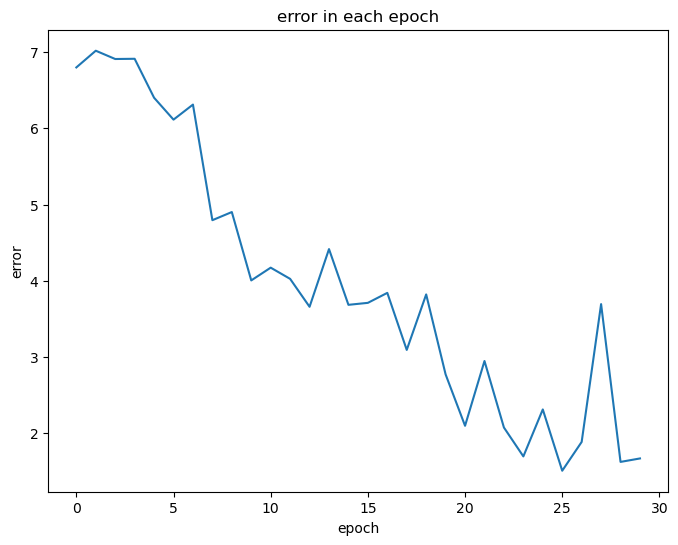

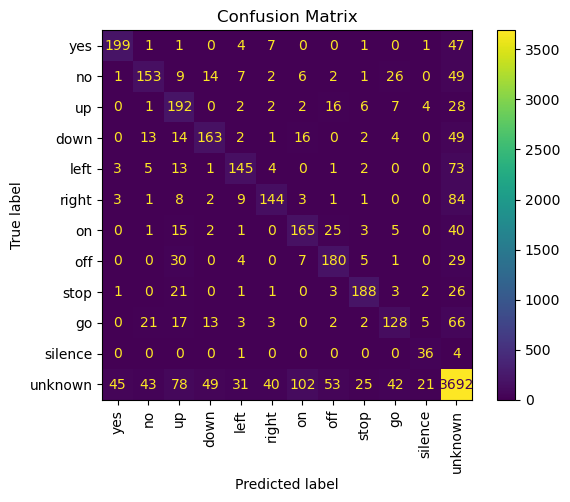

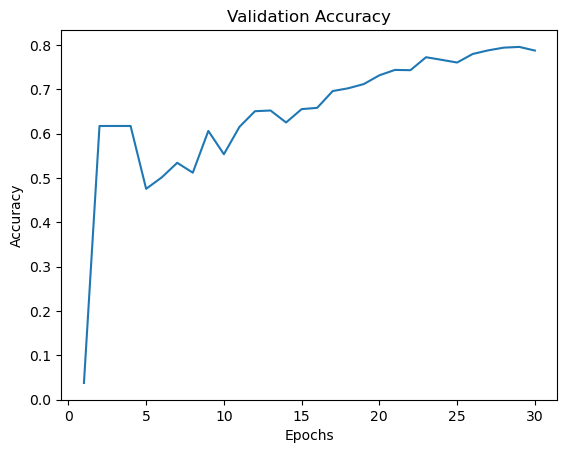

In [28]:
model = perform_test(model = model, 
                     train_data = train_data, 
                     test_data = valid_data, 
                     batch_size = batch_size, 
                     num_epochs = num_epochs, 
                     criterion = criterion, 
                     optimizer = optimizer, 
                     scheduler = scheduler,
                     device = DEVICE,
                     all_classes = classes_index,
                     trans_mode = True)

## Approaches tests

### Two networks

In [13]:
model_silence = models.InceptionClassifierMod(INPUT_SHAPE, 2, num_filters, use_residual, use_bottleneck, depth, kernel_size, bottleneck_size)

model_silence.to(DEVICE)
if DEVICE == torch.device('cuda'):
    model_silence = model_silence.cuda()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_silence.parameters(), lr = lr, weight_decay = weight_decay)
scheduler = LinearLR(optimizer = optimizer, start_factor = 1.0, end_factor = 0.01, total_iters = num_epochs)

In [14]:
_, y_train_num = torch.max(y_train, 1)

y_train_silence = torch.zeros(y_train.shape[0],2).long()

y_train_silence[y_train_num == 21] = torch.tensor([[0, 1]])
y_train_silence[y_train_num != 21] = torch.tensor([[1, 0]])

y_val_silence = torch.tensor(y_val)

y_val_silence[y_val==21] = 1
y_val_silence[y_val!=21] = 0

train_data_silence = TensorDataset(X_train.float().transpose(2, 1), y_train_silence.float())
valid_data_silence = TensorDataset(X_val.float().transpose(2, 1), y_val_silence.float())


classes_index_silence = convert_list_dict(['audio','silence'])

Epoch [1/30], Train loss: 0.0000
Test accuracy: 0.9969293756397134
Epoch [2/30], Train loss: 0.0000
Test accuracy: 0.9978066968855096
Epoch [3/30], Train loss: 0.0001
Test accuracy: 0.9973680362626115
Epoch [4/30], Train loss: 0.0000
Test accuracy: 0.9979529170931423
Epoch [5/30], Train loss: 0.0001
Test accuracy: 0.9934200906565287
Epoch [6/30], Train loss: 0.0000
Test accuracy: 0.9979529170931423
Epoch [7/30], Train loss: 0.0001
Test accuracy: 0.9978066968855096
Epoch [8/30], Train loss: 0.0000
Test accuracy: 0.9991226787542038
Epoch [9/30], Train loss: 0.0000
Test accuracy: 0.9992688989618366
Epoch [10/30], Train loss: 0.0000
Test accuracy: 0.9956133937710192
Epoch [11/30], Train loss: 0.0000
Test accuracy: 0.9997075595847346
Epoch [12/30], Train loss: 0.0000
Test accuracy: 0.9983915777160404
Epoch [13/30], Train loss: 0.0000
Test accuracy: 1.0
Epoch [14/30], Train loss: 0.0000
Test accuracy: 1.0
Epoch [15/30], Train loss: 0.0000
Test accuracy: 1.0
Epoch [16/30], Train loss: 0.0000


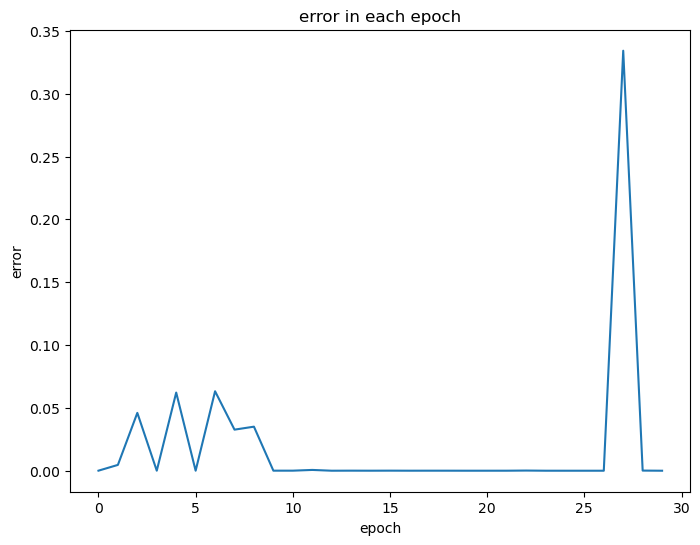

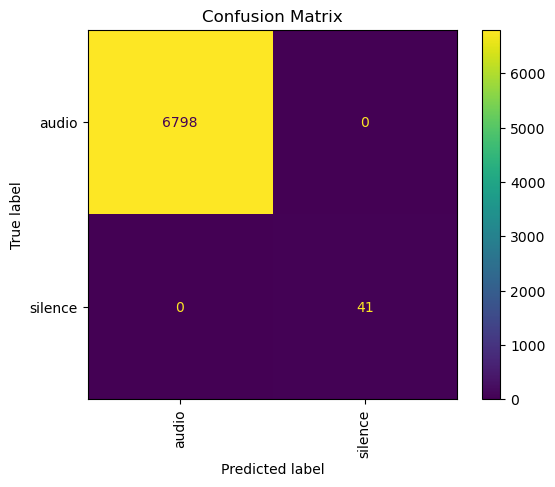

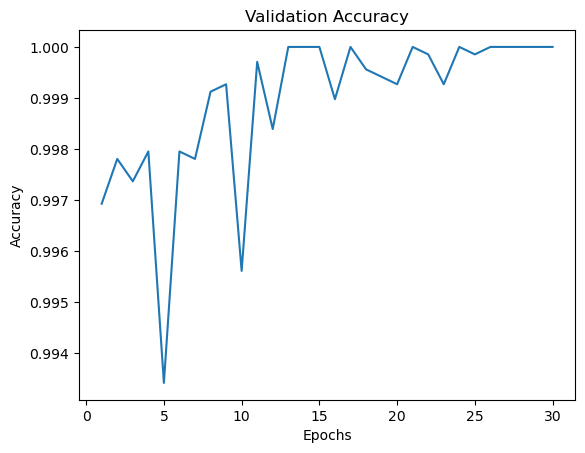

In [15]:
model_silence = perform_test(model = model_silence, 
                     train_data = train_data_silence, 
                     test_data = valid_data_silence, 
                     batch_size = batch_size, 
                     num_epochs = 15, 
                     criterion = criterion, 
                     optimizer = optimizer, 
                     scheduler = scheduler,
                     device = DEVICE,
                     all_classes=classes_index_silence,
                     trans_mode = False,
                     convert_unknown=False)

In [16]:
model_audio = models.InceptionClassifierMod(INPUT_SHAPE, CLASSES_COUNT-1, num_filters, use_residual, use_bottleneck, depth, kernel_size, bottleneck_size)

model_audio.to(DEVICE)
if DEVICE == torch.device('cuda'):
    model_audio = model_audio.cuda()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_audio.parameters(), lr = lr, weight_decay = weight_decay)
scheduler = LinearLR(optimizer = optimizer, start_factor = 1.0, end_factor = 0.01, total_iters = num_epochs)

In [17]:
_, y_train_num = torch.max(y_train, 1)

X_train_audio = torch.tensor(X_train[y_train_num != 21])
y_train_audio = torch.tensor(y_train_num[y_train_num != 21])
y_train_audio[y_train_audio>21] -= 1

X_val_audio = torch.tensor(X_val[y_val != 21])
y_val_audio = torch.tensor(y_val[y_val != 21])
y_val_audio[y_val_audio>21] -= 1

y_train_audio = torch.nn.functional.one_hot(y_train_audio, num_classes=CLASSES_COUNT-1)

classes_audio = classes.copy()
classes_audio.remove('silence')
classes_index_audio = convert_list_dict(classes_audio)
print(classes)
print(classes_index_audio)

train_data_audio = TensorDataset(X_train_audio.float().transpose(2, 1), y_train_audio.float())
valid_data_audio = TensorDataset(X_val_audio.float().transpose(2, 1), y_val_audio.float())

['bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five', 'four', 'go', 'happy', 'house', 'left', 'marvin', 'nine', 'no', 'off', 'on', 'one', 'right', 'seven', 'sheila', 'silence', 'six', 'stop', 'three', 'tree', 'two', 'up', 'wow', 'yes', 'zero']
{0: 'bed', 1: 'bird', 2: 'cat', 3: 'dog', 4: 'down', 5: 'eight', 6: 'five', 7: 'four', 8: 'go', 9: 'happy', 10: 'house', 11: 'left', 12: 'marvin', 13: 'nine', 14: 'no', 15: 'off', 16: 'on', 17: 'one', 18: 'right', 19: 'seven', 20: 'sheila', 21: 'six', 22: 'stop', 23: 'three', 24: 'tree', 25: 'two', 26: 'up', 27: 'wow', 28: 'yes', 29: 'zero'}


Epoch [1/30], Train loss: 0.0026
Test accuracy: 0.5825242718446602
Epoch [2/30], Train loss: 0.0047
Test accuracy: 0.7744924977934686
Epoch [3/30], Train loss: 0.0001
Test accuracy: 0.8595175051485731
Epoch [4/30], Train loss: 0.0023
Test accuracy: 0.861724036481318
Epoch [5/30], Train loss: 0.0015
Test accuracy: 0.8654015887025596
Epoch [6/30], Train loss: 0.0045
Test accuracy: 0.900853192115328
Epoch [7/30], Train loss: 0.0033
Test accuracy: 0.8987937628714328
Epoch [8/30], Train loss: 0.0000
Test accuracy: 0.9065901735804649
Epoch [9/30], Train loss: 0.0051
Test accuracy: 0.8927625772285966
Epoch [10/30], Train loss: 0.0059
Test accuracy: 0.9180641365107385
Epoch [11/30], Train loss: 0.0004
Test accuracy: 0.9211532803765814
Epoch [12/30], Train loss: 0.0000
Test accuracy: 0.9274786701971168
Epoch [13/30], Train loss: 0.0100
Test accuracy: 0.9018829067372757
Epoch [14/30], Train loss: 0.0064
Test accuracy: 0.9279199764636658
Epoch [15/30], Train loss: 0.0007
Test accuracy: 0.93556928

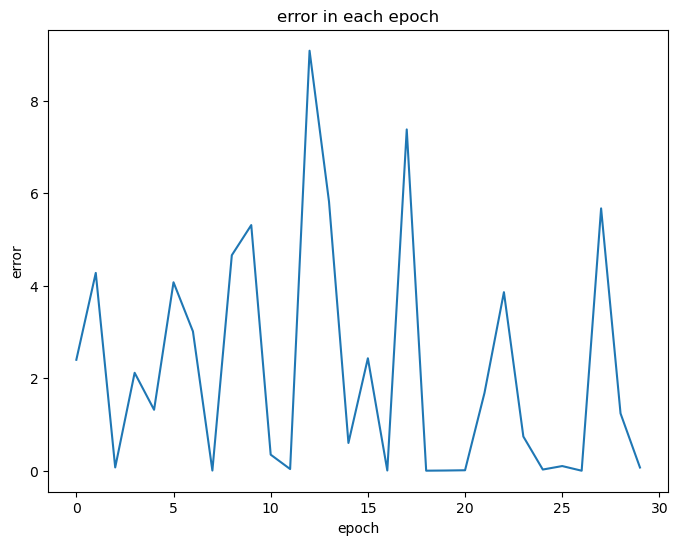

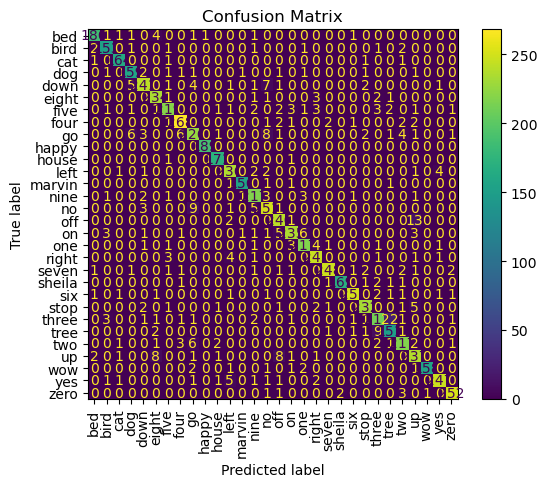

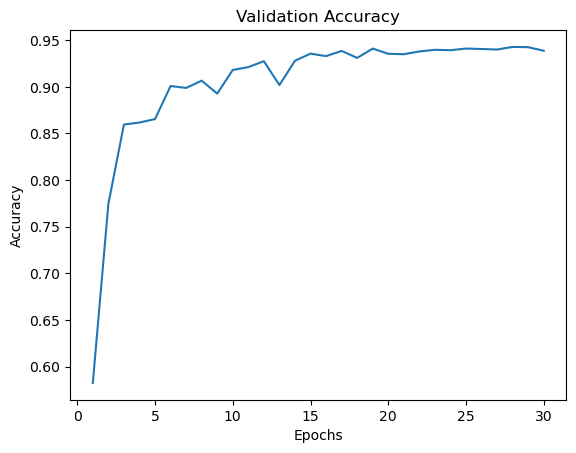

In [18]:
model_audio = perform_test(model = model_audio, 
                     train_data = train_data_audio, 
                     test_data = valid_data_audio, 
                     batch_size = batch_size, 
                     num_epochs = num_epochs, 
                     criterion = criterion, 
                     optimizer = optimizer, 
                     scheduler = scheduler,
                     device = DEVICE,
                     all_classes=classes_index_audio,
                     trans_mode = False,
                     convert_unknown=False)

              precision    recall  f1-score   support

         yes     0.9686    0.9464    0.9574       261
          no     0.8996    0.9296    0.9144       270
          up     0.8778    0.9115    0.8943       260
        down     0.9377    0.9129    0.9251       264
        left     0.9328    0.9555    0.9440       247
       right     0.9423    0.9570    0.9496       256
          on     0.9438    0.9144    0.9289       257
         off     0.9057    0.9375    0.9213       256
        stop     0.9547    0.9431    0.9489       246
          go     0.8968    0.8692    0.8828       260
     silence     1.0000    1.0000    1.0000        41
     unknown     0.9832    0.9818    0.9825      4221

    accuracy                         0.9614      6839
   macro avg     0.9369    0.9382    0.9374      6839
weighted avg     0.9616    0.9614    0.9614      6839



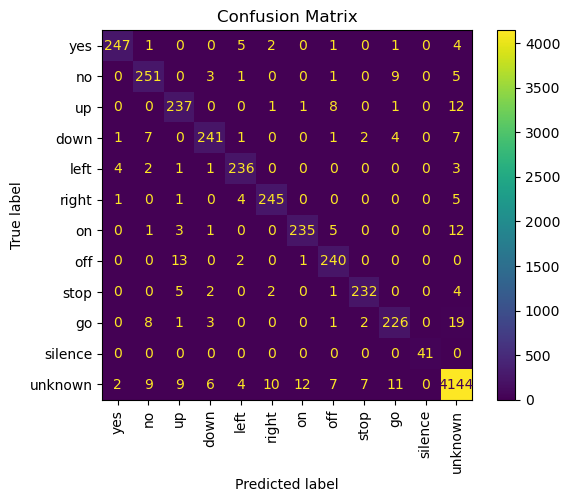

In [19]:
_=evaluate_2_models(model_silence,model_audio,valid_data,DEVICE,classes_index)

### "unknown" class at the begining

In [13]:
from experiments import CLASSES,VAL_CLASSES

_, y_train_num = torch.max(y_train, 1)
print(y_train_num.shape)

all_classes = classes_index.copy()

for key, value in all_classes.items():
    if value not in VAL_CLASSES:
        all_classes[key] = "unknown"

y_train_unknown = np.array([all_classes[num] for num in y_train_num.numpy()])
y_val_unknown = np.array([all_classes[num] for num in y_val.numpy()])

y_train_unknown = [CLASSES.index(name) for name in y_train_unknown]
y_val_unknown = [CLASSES.index(name) for name in y_val_unknown]

torch.Size([58284])


In [14]:
# creating datasets
y_train_unknown = torch.tensor(y_train_unknown).long()
# print(y_train_unknown.shape)

y_val_unknown = torch.tensor(y_val_unknown).long()
y_train_unknown = F.one_hot(y_train_unknown, num_classes = len(CLASSES))

# print(y_train_unknown.shape)

classes_audio = classes.copy()
classes_audio.remove('silence')
classes_index_unknown = convert_list_dict(CLASSES)


train_data_unknown = TensorDataset(X_train.float().transpose(2, 1), y_train_unknown.float())
valid_data_unknown = TensorDataset(X_val.float().transpose(2, 1), y_val_unknown.float())

torch.Size([58284])


torch.Size([58284, 12])


In [15]:
model = models.InceptionClassifierMod(INPUT_SHAPE, len(CLASSES), num_filters, use_residual, use_bottleneck, depth, kernel_size, bottleneck_size)

model.to(DEVICE)
if DEVICE == torch.device('cuda'):
    model = model.cuda()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = lr, weight_decay = weight_decay)
scheduler = LinearLR(optimizer = optimizer, start_factor = 1.0, end_factor = 0.01, total_iters = num_epochs)

Epoch [1/30], Train loss: 0.0008
Test accuracy: 0.9172393624798947
Epoch [2/30], Train loss: 0.0010
Test accuracy: 0.9178242433104254
Epoch [3/30], Train loss: 0.0005
Test accuracy: 0.9232343909928352
Epoch [4/30], Train loss: 0.0001
Test accuracy: 0.9336160257347565
Epoch [5/30], Train loss: 0.0004
Test accuracy: 0.9461909635911683
Epoch [6/30], Train loss: 0.0006
Test accuracy: 0.9361017692645124
Epoch [7/30], Train loss: 0.0001
Test accuracy: 0.9479456060827607
Epoch [8/30], Train loss: 0.0002
Test accuracy: 0.9486767071209241
Epoch [9/30], Train loss: 0.0001
Test accuracy: 0.9469220646293318
Epoch [10/30], Train loss: 0.0000
Test accuracy: 0.9540868548033338
Epoch [11/30], Train loss: 0.0001
Test accuracy: 0.9450212019301067
Epoch [12/30], Train loss: 0.0000
Test accuracy: 0.9526246527270069
Epoch [13/30], Train loss: 0.0001
Test accuracy: 0.9510162304430473
Epoch [14/30], Train loss: 0.0001
Test accuracy: 0.958327240824682
Epoch [15/30], Train loss: 0.0002
Test accuracy: 0.9539406

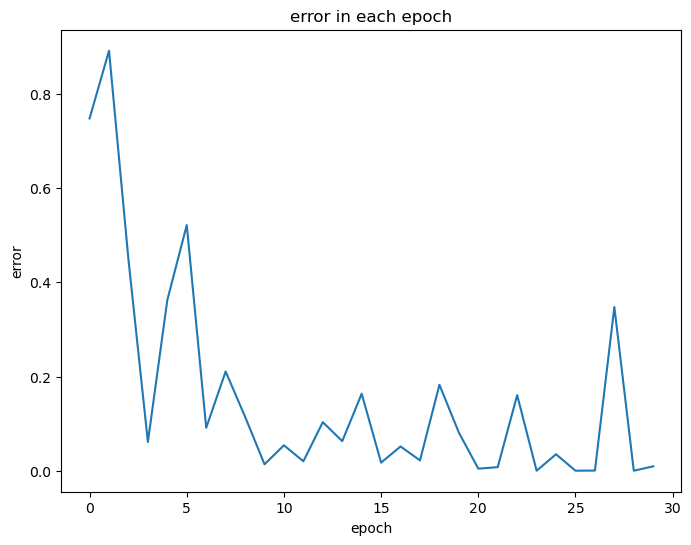

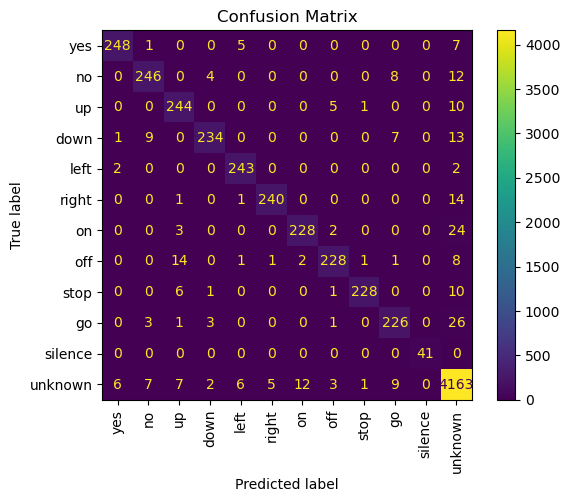

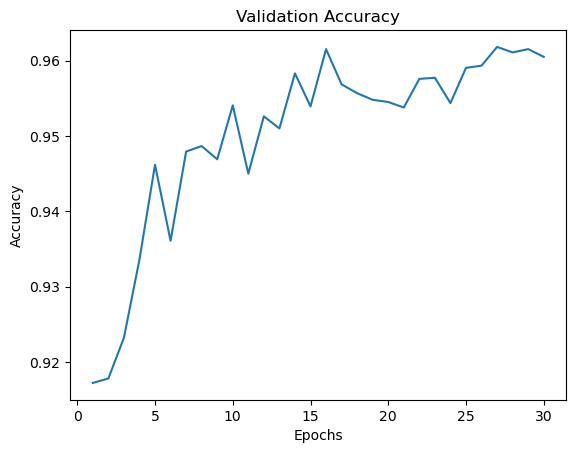

In [17]:
model = perform_test(model = model, 
                     train_data = train_data_unknown, 
                     test_data = valid_data_unknown, 
                     batch_size = batch_size, 
                     num_epochs = num_epochs, 
                     criterion = criterion, 
                     optimizer = optimizer, 
                     scheduler = scheduler,
                     device = DEVICE,
                     all_classes=classes_index_unknown,
                     trans_mode = False)

## Augmentation tests

### masking_param = 40

In [21]:
transform = [
    torchaudio.transforms.TimeMasking(time_mask_param = masking_param), 
    torchaudio.transforms.FrequencyMasking(freq_mask_param = masking_param),
    ]

In [22]:
model = models.InceptionClassifierMod(INPUT_SHAPE, CLASSES_COUNT, num_filters, use_residual, use_bottleneck, depth, kernel_size, bottleneck_size)

model.to(DEVICE)
if DEVICE == torch.device('cuda'):
    model = model.cuda()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = lr, weight_decay = weight_decay)
scheduler = LinearLR(optimizer = optimizer, start_factor = 1.0, end_factor = 0.01, total_iters = num_epochs)

Epoch [1/30], Train loss: 0.0019
Test accuracy: 0.8878491007457231
Epoch [2/30], Train loss: 0.0017
Test accuracy: 0.8896037432373154
Epoch [3/30], Train loss: 0.0025
Test accuracy: 0.8621143442023688
Epoch [4/30], Train loss: 0.0012
Test accuracy: 0.9210410878783448
Epoch [5/30], Train loss: 0.0030
Test accuracy: 0.9418043573621875
Epoch [6/30], Train loss: 0.0012
Test accuracy: 0.9254276941073256
Epoch [7/30], Train loss: 0.0015
Test accuracy: 0.9388799532095335
Epoch [8/30], Train loss: 0.0011
Test accuracy: 0.932446264073695
Epoch [9/30], Train loss: 0.0004
Test accuracy: 0.9466296242140664
Epoch [10/30], Train loss: 0.0004
Test accuracy: 0.9533557537651703
Epoch [11/30], Train loss: 0.0010
Test accuracy: 0.9495540283667203
Epoch [12/30], Train loss: 0.0010
Test accuracy: 0.9222108495394064
Epoch [13/30], Train loss: 0.0003
Test accuracy: 0.9592045620704781
Epoch [14/30], Train loss: 0.0020
Test accuracy: 0.9539406345957011
Epoch [15/30], Train loss: 0.0012
Test accuracy: 0.9470682

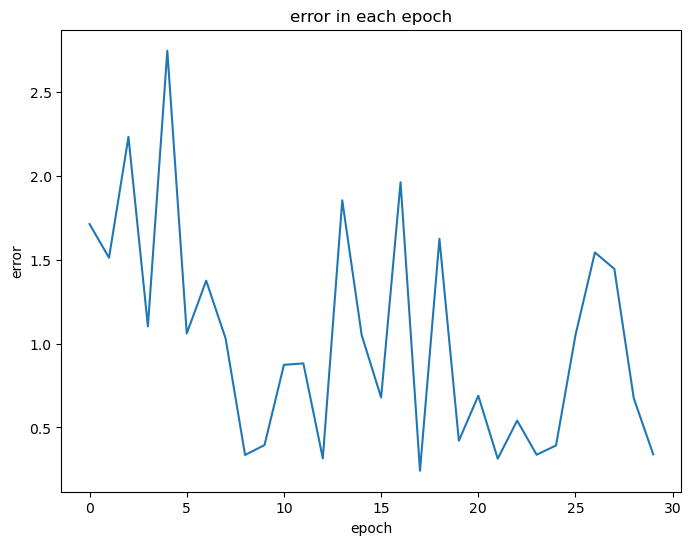

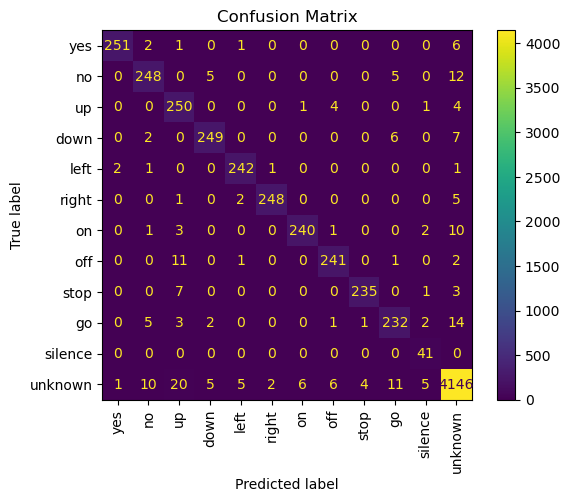

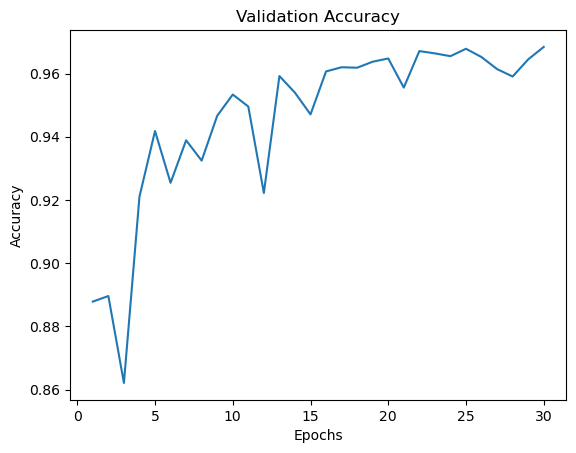

In [24]:
model = perform_test(model = model, 
                     train_data = train_data, 
                     test_data = valid_data, 
                     batch_size = batch_size, 
                     num_epochs = num_epochs, 
                     criterion = criterion, 
                     optimizer = optimizer, 
                     scheduler = scheduler,
                     device = DEVICE,
                     all_classes=classes_index,
                     trans_mode = False,
                     transform = transform)

### masking_param = 30

In [ ]:
masking_param = 30

In [ ]:
transform = [
    torchaudio.transforms.TimeMasking(time_mask_param = masking_param), 
    torchaudio.transforms.FrequencyMasking(freq_mask_param = masking_param),
    ]

In [ ]:
model = models.InceptionClassifierMod(INPUT_SHAPE, CLASSES_COUNT, num_filters, use_residual, use_bottleneck, depth, kernel_size, bottleneck_size)

model.to(DEVICE)
if DEVICE == torch.device('cuda'):
    model = model.cuda()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = lr, weight_decay = weight_decay)
scheduler = LinearLR(optimizer = optimizer, start_factor = 1.0, end_factor = 0.01, total_iters = num_epochs)

Epoch [1/30], Train loss: 0.0025
Test accuracy: 0.6859189940049715
Epoch [2/30], Train loss: 0.0018
Test accuracy: 0.8724959789442901
Epoch [3/30], Train loss: 0.0024
Test accuracy: 0.8401813130574646
Epoch [4/30], Train loss: 0.0012
Test accuracy: 0.9029097821318907
Epoch [5/30], Train loss: 0.0016
Test accuracy: 0.9371253107179413
Epoch [6/30], Train loss: 0.0013
Test accuracy: 0.9283520982599796
Epoch [7/30], Train loss: 0.0012
Test accuracy: 0.9450212019301067
Epoch [8/30], Train loss: 0.0010
Test accuracy: 0.9432665594385145
Epoch [9/30], Train loss: 0.0004
Test accuracy: 0.9501389091972511
Epoch [10/30], Train loss: 0.0009
Test accuracy: 0.9504313496125164
Epoch [11/30], Train loss: 0.0004
Test accuracy: 0.9562801579178243
Epoch [12/30], Train loss: 0.0006
Test accuracy: 0.9416581371545547
Epoch [13/30], Train loss: 0.0001
Test accuracy: 0.9540868548033338
Epoch [14/30], Train loss: 0.0018
Test accuracy: 0.9577423599941511
Epoch [15/30], Train loss: 0.0009
Test accuracy: 0.953940

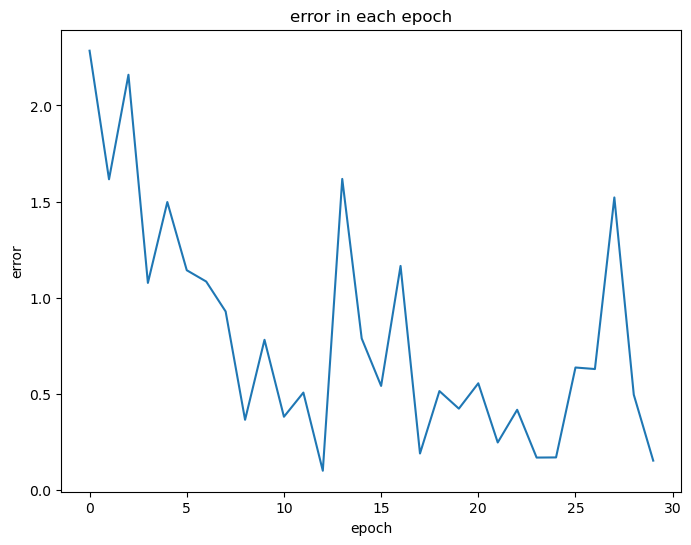

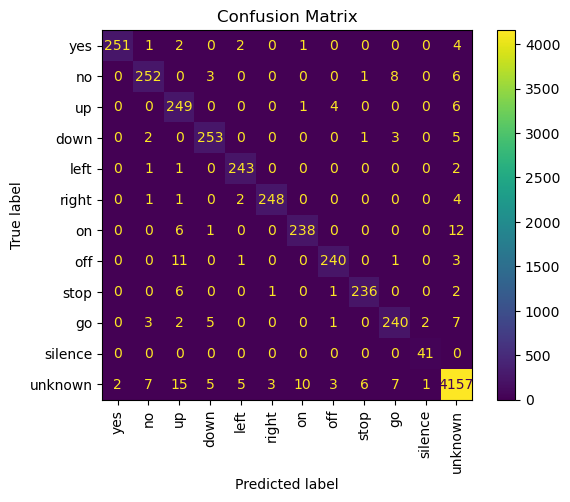

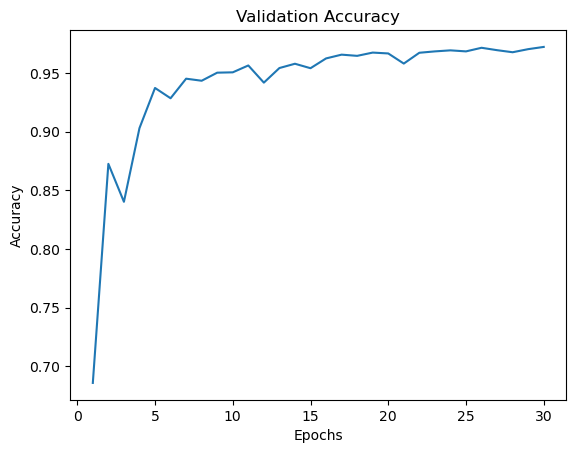

In [ ]:
model = perform_test(model = model, 
                     train_data = train_data, 
                     test_data = valid_data, 
                     batch_size = batch_size, 
                     num_epochs = num_epochs, 
                     criterion = criterion, 
                     optimizer = optimizer, 
                     scheduler = scheduler,
                     device = DEVICE,
                     all_classes=classes_index,
                     trans_mode = False,
                     transform = transform)

## Hyperparametres tests

### Epoch tests

#### num_epochs = 20

In [ ]:
num_epochs = 20

In [ ]:
model = models.InceptionClassifier(INPUT_SHAPE, CLASSES_COUNT, num_filters, use_residual, use_bottleneck, depth, kernel_size, bottleneck_size)

model.to(DEVICE)
if DEVICE == torch.device('cuda'):
    model = model.cuda()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = lr, weight_decay = weight_decay)
scheduler = LinearLR(optimizer = optimizer, start_factor = 1.0, end_factor = 0.01, total_iters = num_epochs)

transform = [
    torchaudio.transforms.TimeMasking(time_mask_param = masking_param), 
    torchaudio.transforms.FrequencyMasking(freq_mask_param = masking_param),
    ]

Epoch [1/20], Train loss: 0.0040
Test accuracy: 0.6590144758005556
Epoch [2/20], Train loss: 0.0030
Test accuracy: 0.8265828337476239
Epoch [3/20], Train loss: 0.0030
Test accuracy: 0.8707413364526978
Epoch [4/20], Train loss: 0.0016
Test accuracy: 0.8860944582541307
Epoch [5/20], Train loss: 0.0029
Test accuracy: 0.9198713262172832
Epoch [6/20], Train loss: 0.0012
Test accuracy: 0.93054540137447
Epoch [7/20], Train loss: 0.0019
Test accuracy: 0.9372715309255739
Epoch [8/20], Train loss: 0.0010
Test accuracy: 0.9283520982599796
Epoch [9/20], Train loss: 0.0009
Test accuracy: 0.9400497148705951
Epoch [10/20], Train loss: 0.0005
Test accuracy: 0.9523322123117415
Epoch [11/20], Train loss: 0.0010
Test accuracy: 0.9401959350782279
Epoch [12/20], Train loss: 0.0012
Test accuracy: 0.8866793390846615
Epoch [13/20], Train loss: 0.0003
Test accuracy: 0.9552566164643954
Epoch [14/20], Train loss: 0.0018
Test accuracy: 0.9510162304430473
Epoch [15/20], Train loss: 0.0010
Test accuracy: 0.94736072

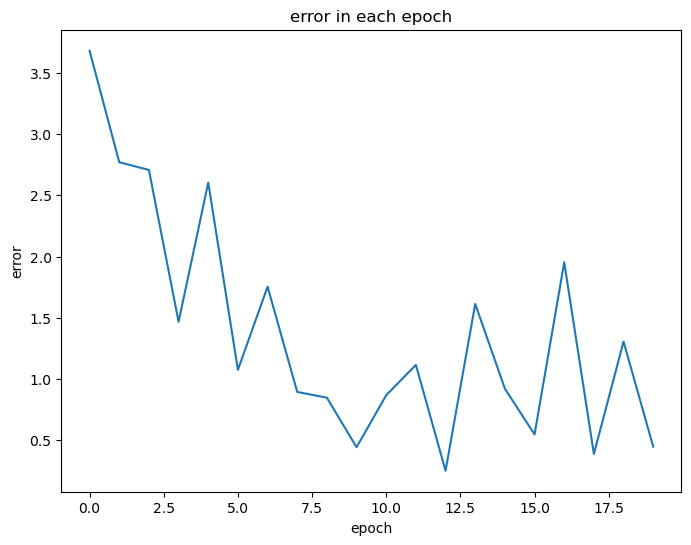

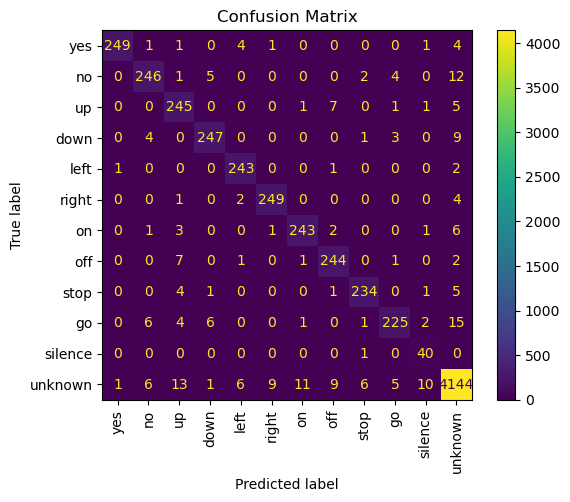

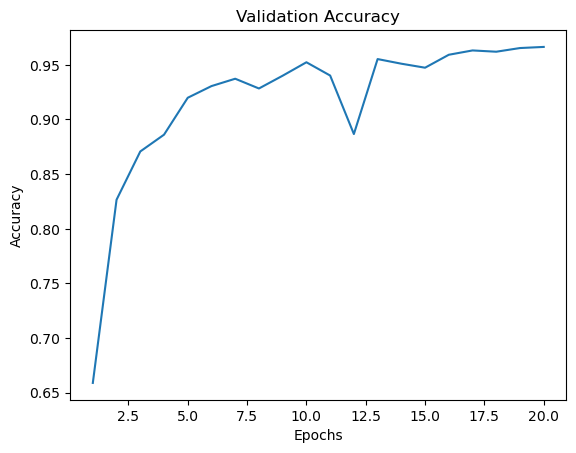

In [ ]:
model = perform_test(model = model, 
                     train_data = train_data, 
                     test_data = valid_data, 
                     batch_size = batch_size, 
                     num_epochs = num_epochs, 
                     criterion = criterion, 
                     optimizer = optimizer, 
                     scheduler = scheduler,
                     device = DEVICE,
                     all_classes=classes_index,
                     trans_mode = False,
                     transform = transform)

#### num_epochs = 50

In [ ]:
num_epochs = 50

In [ ]:
model = models.InceptionClassifier(INPUT_SHAPE, CLASSES_COUNT, num_filters, use_residual, use_bottleneck, depth, kernel_size, bottleneck_size)

model.to(DEVICE)
if DEVICE == torch.device('cuda'):
    model = model.cuda()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = lr, weight_decay = weight_decay)
scheduler = LinearLR(optimizer = optimizer, start_factor = 1.0, end_factor = 0.01, total_iters = num_epochs)

transform = [
    torchaudio.transforms.TimeMasking(time_mask_param = masking_param), 
    torchaudio.transforms.FrequencyMasking(freq_mask_param = masking_param),
    ]

Epoch [1/50], Train loss: 0.0034
Test accuracy: 0.667495247843252
Epoch [2/50], Train loss: 0.0030
Test accuracy: 0.7929521859921042
Epoch [3/50], Train loss: 0.0030
Test accuracy: 0.8922357069747039
Epoch [4/50], Train loss: 0.0018
Test accuracy: 0.8894575230296827
Epoch [5/50], Train loss: 0.0029
Test accuracy: 0.8951601111273578
Epoch [6/50], Train loss: 0.0013
Test accuracy: 0.9146073987425062
Epoch [7/50], Train loss: 0.0012
Test accuracy: 0.9273285568065507
Epoch [8/50], Train loss: 0.0011
Test accuracy: 0.9347857873958181
Epoch [9/50], Train loss: 0.0006
Test accuracy: 0.9396110542476971
Epoch [10/50], Train loss: 0.0005
Test accuracy: 0.9438514402690452
Epoch [11/50], Train loss: 0.0006
Test accuracy: 0.9399034946629624
Epoch [12/50], Train loss: 0.0010
Test accuracy: 0.8945752302968271
Epoch [13/50], Train loss: 0.0006
Test accuracy: 0.9501389091972511
Epoch [14/50], Train loss: 0.0019
Test accuracy: 0.9494078081590875
Epoch [15/50], Train loss: 0.0011
Test accuracy: 0.9241117

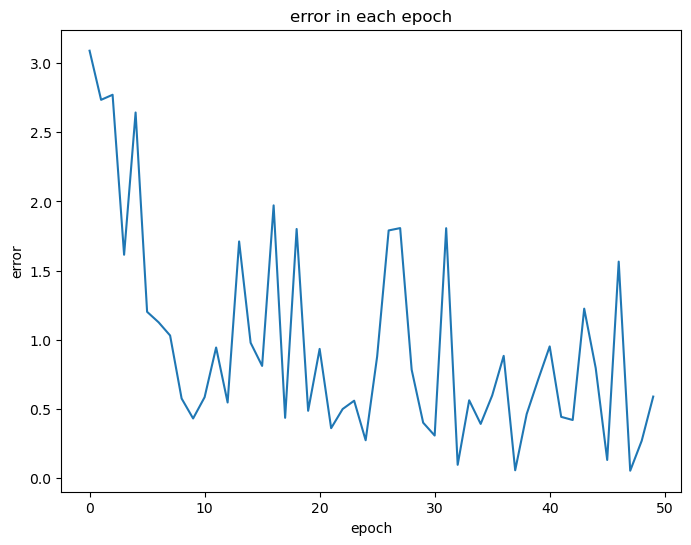

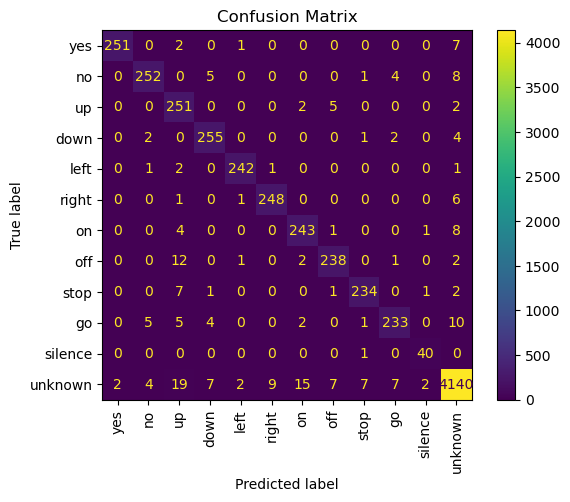

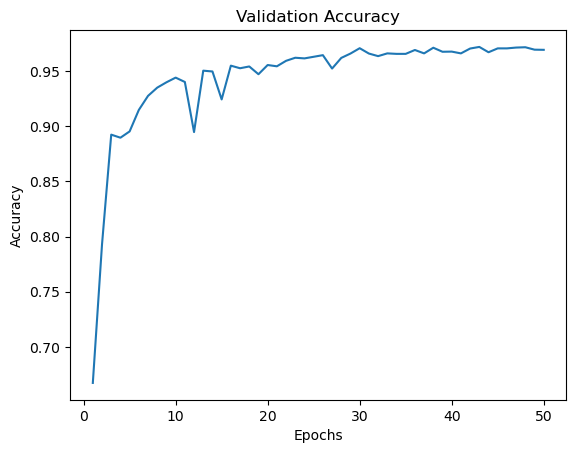

In [ ]:
model = perform_test(model = model, 
                     train_data = train_data, 
                     test_data = valid_data, 
                     batch_size = batch_size, 
                     num_epochs = num_epochs, 
                     criterion = criterion, 
                     optimizer = optimizer, 
                     scheduler = scheduler,
                     device = DEVICE,
                     all_classes=classes_index,
                     trans_mode = False,
                     transform = transform)

### Batch tests

#### batch_size = 32

In [ ]:
batch_size = 32

In [ ]:
model = models.InceptionClassifier(INPUT_SHAPE, CLASSES_COUNT, num_filters, use_residual, use_bottleneck, depth, kernel_size, bottleneck_size)

model.to(DEVICE)
if DEVICE == torch.device('cuda'):
    model = model.cuda()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = lr, weight_decay = weight_decay)
scheduler = LinearLR(optimizer = optimizer, start_factor = 1.0, end_factor = 0.01, total_iters = num_epochs)

transform = [
    torchaudio.transforms.TimeMasking(time_mask_param = masking_param), 
    torchaudio.transforms.FrequencyMasking(freq_mask_param = masking_param),
    ]

Epoch [1/30], Train loss: 0.0020
Test accuracy: 0.6958619681239947
Epoch [2/30], Train loss: 0.0012
Test accuracy: 0.8343325047521567
Epoch [3/30], Train loss: 0.0011
Test accuracy: 0.8670858312618804
Epoch [4/30], Train loss: 0.0018
Test accuracy: 0.9027635619242579
Epoch [5/30], Train loss: 0.0018
Test accuracy: 0.937710191548472
Epoch [6/30], Train loss: 0.0012
Test accuracy: 0.9109518935516888
Epoch [7/30], Train loss: 0.0007
Test accuracy: 0.9346395671881854
Epoch [8/30], Train loss: 0.0009
Test accuracy: 0.9428278988156163
Epoch [9/30], Train loss: 0.0009
Test accuracy: 0.9418043573621875
Epoch [10/30], Train loss: 0.0013
Test accuracy: 0.9539406345957011
Epoch [11/30], Train loss: 0.0003
Test accuracy: 0.9532095335575377
Epoch [12/30], Train loss: 0.0002
Test accuracy: 0.9578885802017839
Epoch [13/30], Train loss: 0.0010
Test accuracy: 0.9540868548033338
Epoch [14/30], Train loss: 0.0010
Test accuracy: 0.9498464687819856
Epoch [15/30], Train loss: 0.0015
Test accuracy: 0.9546717

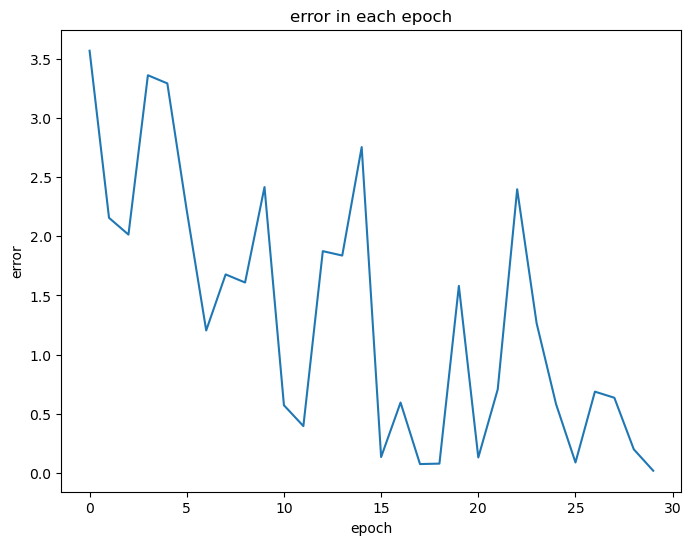

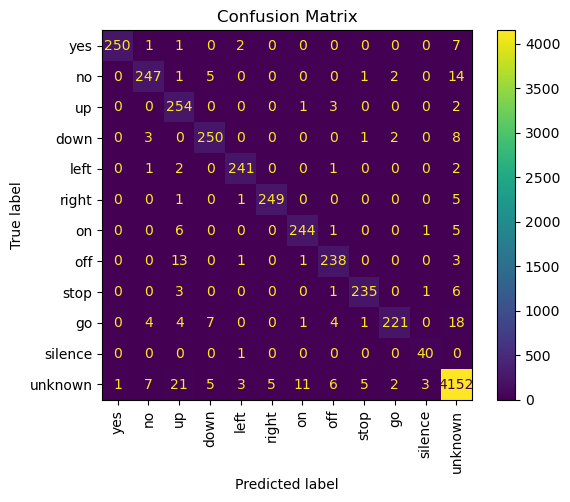

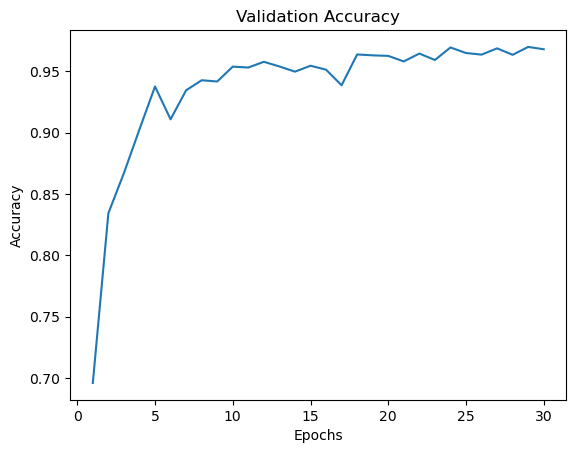

In [ ]:
model = perform_test(model = model, 
                     train_data = train_data, 
                     test_data = valid_data, 
                     batch_size = batch_size, 
                     num_epochs = num_epochs, 
                     criterion = criterion, 
                     optimizer = optimizer, 
                     scheduler = scheduler,
                     device = DEVICE,
                     all_classes=classes_index,
                     trans_mode = False,
                     transform = transform)

#### batch_size = 128

In [ ]:
batch_size = 128

In [ ]:
model = models.InceptionClassifier(INPUT_SHAPE, CLASSES_COUNT, num_filters, use_residual, use_bottleneck, depth, kernel_size, bottleneck_size)

model.to(DEVICE)
if DEVICE == torch.device('cuda'):
    model = model.cuda()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = lr, weight_decay = weight_decay)
scheduler = LinearLR(optimizer = optimizer, start_factor = 1.0, end_factor = 0.01, total_iters = num_epochs)

transform = [
    torchaudio.transforms.TimeMasking(time_mask_param = masking_param), 
    torchaudio.transforms.FrequencyMasking(freq_mask_param = masking_param),
    ]

Epoch [1/30], Train loss: 0.0121
Test accuracy: 0.6019885948238046
Epoch [2/30], Train loss: 0.0055
Test accuracy: 0.6891358385728907
Epoch [3/30], Train loss: 0.0064
Test accuracy: 0.7850562947799385
Epoch [4/30], Train loss: 0.0077
Test accuracy: 0.8831700541014769
Epoch [5/30], Train loss: 0.0020
Test accuracy: 0.8414972949261588
Epoch [6/30], Train loss: 0.0050
Test accuracy: 0.8841935955549057
Epoch [7/30], Train loss: 0.0026
Test accuracy: 0.9312765024126334
Epoch [8/30], Train loss: 0.0051
Test accuracy: 0.9125603158356485
Epoch [9/30], Train loss: 0.0032
Test accuracy: 0.9093434712677292
Epoch [10/30], Train loss: 0.0033
Test accuracy: 0.9378564117561047
Epoch [11/30], Train loss: 0.0009
Test accuracy: 0.9457523029682702
Epoch [12/30], Train loss: 0.0019
Test accuracy: 0.948238046498026
Epoch [13/30], Train loss: 0.0029
Test accuracy: 0.9521859921041088
Epoch [14/30], Train loss: 0.0026
Test accuracy: 0.93054540137447
Epoch [15/30], Train loss: 0.0015
Test accuracy: 0.951601111

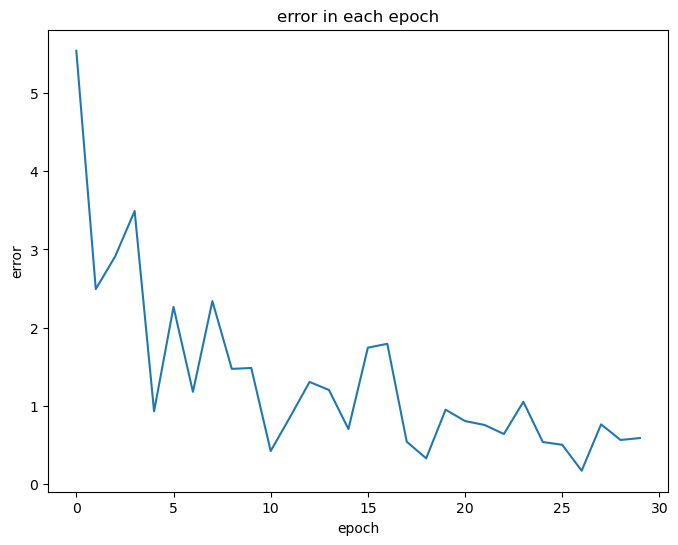

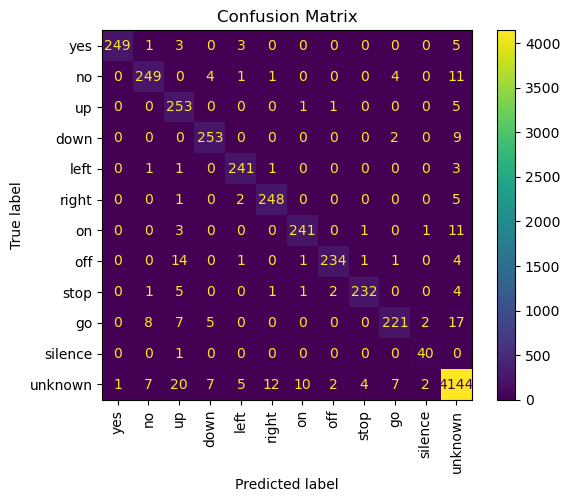

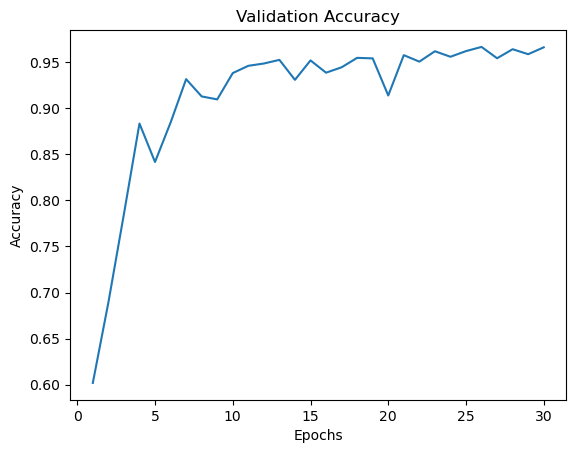

In [ ]:
model = perform_test(model = model, 
                     train_data = train_data, 
                     test_data = valid_data, 
                     batch_size = batch_size, 
                     num_epochs = num_epochs, 
                     criterion = criterion, 
                     optimizer = optimizer, 
                     scheduler = scheduler,
                     device = DEVICE,
                     all_classes=classes_index,
                     trans_mode = False,
                     transform = transform)

### Lr tests

#### lr = 0.05

In [ ]:
lr = 0.05

In [ ]:
model = models.InceptionClassifier(INPUT_SHAPE, CLASSES_COUNT, num_filters, use_residual, use_bottleneck, depth, kernel_size, bottleneck_size)

model.to(DEVICE)
if DEVICE == torch.device('cuda'):
    model = model.cuda()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = lr, weight_decay = weight_decay)
scheduler = LinearLR(optimizer = optimizer, start_factor = 1.0, end_factor = 0.01, total_iters = num_epochs)

transform = [
    torchaudio.transforms.TimeMasking(time_mask_param = masking_param), 
    torchaudio.transforms.FrequencyMasking(freq_mask_param = masking_param),
    ]

Epoch [1/30], Train loss: 0.0051
Test accuracy: 0.6138324316420529
Epoch [2/30], Train loss: 0.0049
Test accuracy: 0.6854803333820734
Epoch [3/30], Train loss: 0.0042
Test accuracy: 0.686650095043135
Epoch [4/30], Train loss: 0.0026
Test accuracy: 0.7947068284836964
Epoch [5/30], Train loss: 0.0045
Test accuracy: 0.8493931861383243
Epoch [6/30], Train loss: 0.0014
Test accuracy: 0.8776136862114344
Epoch [7/30], Train loss: 0.0022
Test accuracy: 0.8953063313349905
Epoch [8/30], Train loss: 0.0014
Test accuracy: 0.9053955256616465
Epoch [9/30], Train loss: 0.0012
Test accuracy: 0.9153384997806697
Epoch [10/30], Train loss: 0.0011
Test accuracy: 0.9255739143149583
Epoch [11/30], Train loss: 0.0012
Test accuracy: 0.9217721889165083
Epoch [12/30], Train loss: 0.0014
Test accuracy: 0.8817078520251499
Epoch [13/30], Train loss: 0.0009
Test accuracy: 0.9372715309255739
Epoch [14/30], Train loss: 0.0028
Test accuracy: 0.9249890334844275
Epoch [15/30], Train loss: 0.0015
Test accuracy: 0.9214797

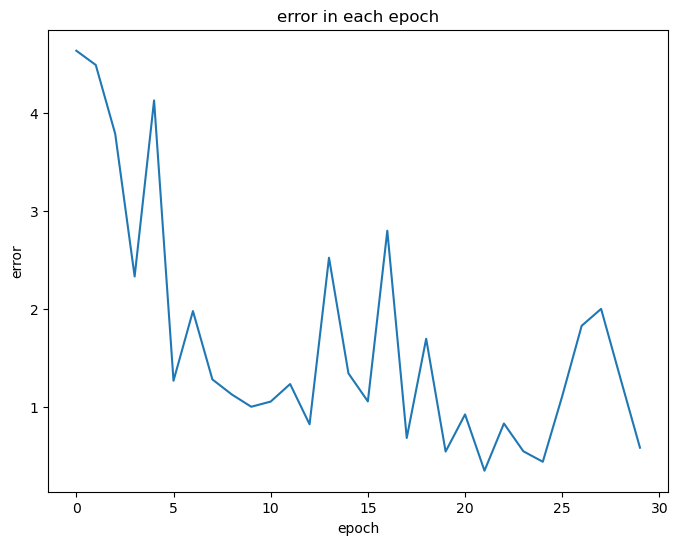

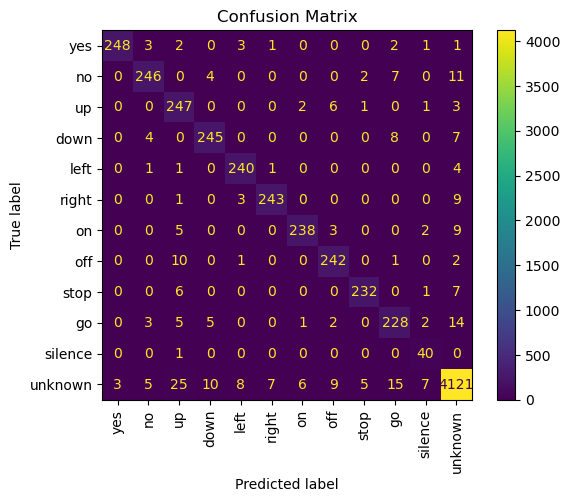

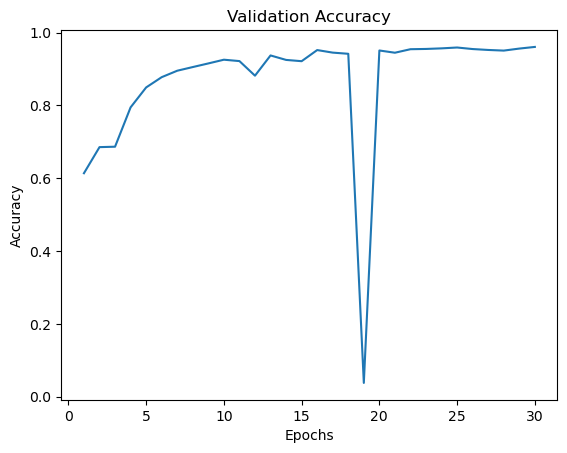

In [ ]:
model = perform_test(model = model, 
                     train_data = train_data, 
                     test_data = valid_data, 
                     batch_size = batch_size, 
                     num_epochs = num_epochs, 
                     criterion = criterion, 
                     optimizer = optimizer, 
                     scheduler = scheduler,
                     device = DEVICE,
                     all_classes=classes_index,
                     trans_mode = False,
                     transform = transform)

#### lr = 0.005

In [ ]:
lr = 0.005

In [ ]:
model = models.InceptionClassifier(INPUT_SHAPE, CLASSES_COUNT, num_filters, use_residual, use_bottleneck, depth, kernel_size, bottleneck_size)

model.to(DEVICE)
if DEVICE == torch.device('cuda'):
    model = model.cuda()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = lr, weight_decay = weight_decay)
scheduler = LinearLR(optimizer = optimizer, start_factor = 1.0, end_factor = 0.01, total_iters = num_epochs)

transform = [
    torchaudio.transforms.TimeMasking(time_mask_param = masking_param), 
    torchaudio.transforms.FrequencyMasking(freq_mask_param = masking_param),
    ]

Epoch [1/30], Train loss: 0.0033
Test accuracy: 0.6932300043866062
Epoch [2/30], Train loss: 0.0032
Test accuracy: 0.8100599502851294
Epoch [3/30], Train loss: 0.0032
Test accuracy: 0.8496856265535897
Epoch [4/30], Train loss: 0.0017
Test accuracy: 0.9020324608860945
Epoch [5/30], Train loss: 0.0031
Test accuracy: 0.9366866500950431
Epoch [6/30], Train loss: 0.0010
Test accuracy: 0.9249890334844275
Epoch [7/30], Train loss: 0.0017
Test accuracy: 0.9394648340400643
Epoch [8/30], Train loss: 0.0008
Test accuracy: 0.9428278988156163
Epoch [9/30], Train loss: 0.0005
Test accuracy: 0.9431203392308817
Epoch [10/30], Train loss: 0.0006
Test accuracy: 0.952039771896476
Epoch [11/30], Train loss: 0.0009
Test accuracy: 0.95116245065068
Epoch [12/30], Train loss: 0.0010
Test accuracy: 0.9204562070478141
Epoch [13/30], Train loss: 0.0004
Test accuracy: 0.956865038748355
Epoch [14/30], Train loss: 0.0018
Test accuracy: 0.9537944143880684
Epoch [15/30], Train loss: 0.0012
Test accuracy: 0.9523322123

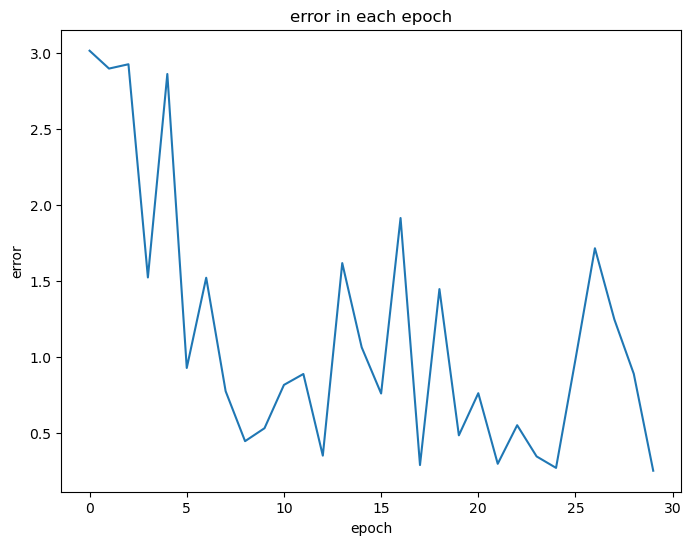

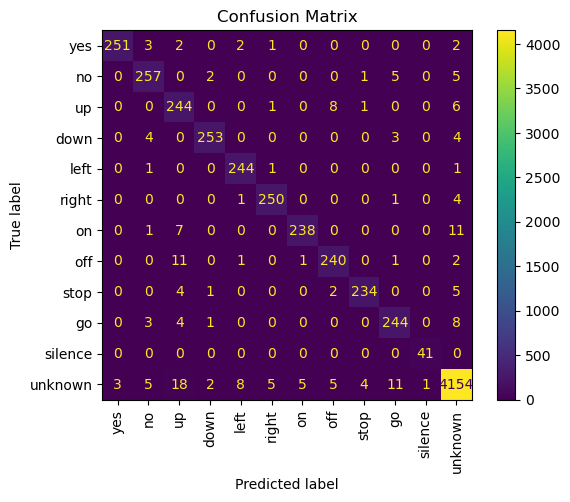

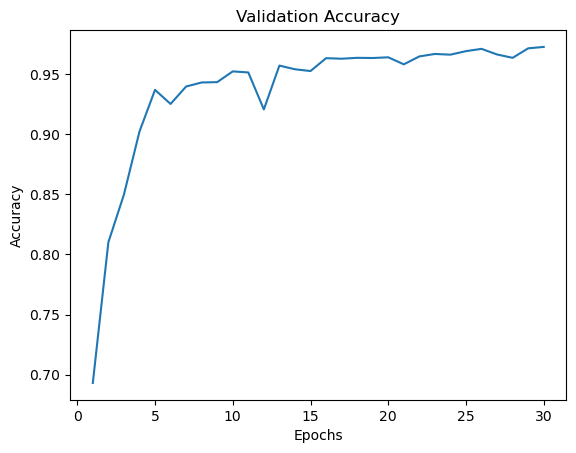

In [ ]:
model = perform_test(model = model, 
                     train_data = train_data, 
                     test_data = valid_data, 
                     batch_size = batch_size, 
                     num_epochs = num_epochs, 
                     criterion = criterion, 
                     optimizer = optimizer, 
                     scheduler = scheduler,
                     device = DEVICE,
                     all_classes=classes_index,
                     trans_mode = False,
                     transform = transform)

# Ensemble

## save

#### mod1

In [13]:
model = models.InceptionClassifier(INPUT_SHAPE, CLASSES_COUNT, num_filters, use_residual, use_bottleneck, depth, kernel_size, bottleneck_size)

model.to(DEVICE)
if DEVICE == torch.device('cuda'):
    model = model.cuda()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = lr, weight_decay = weight_decay)
scheduler = LinearLR(optimizer = optimizer, start_factor = 1.0, end_factor = 0.01, total_iters = num_epochs)

transform = [
    torchaudio.transforms.TimeMasking(time_mask_param = masking_param), 
    torchaudio.transforms.FrequencyMasking(freq_mask_param = masking_param),
    ]

Epoch [1/30], Train loss: 0.0033
Test accuracy: 0.6889896183652581
Epoch [2/30], Train loss: 0.0027
Test accuracy: 0.7822781108349174
Epoch [3/30], Train loss: 0.0027
Test accuracy: 0.8521713700833455
Epoch [4/30], Train loss: 0.0022
Test accuracy: 0.8998391577716041
Epoch [5/30], Train loss: 0.0032
Test accuracy: 0.9248428132767949
Epoch [6/30], Train loss: 0.0012
Test accuracy: 0.9146073987425062
Epoch [7/30], Train loss: 0.0016
Test accuracy: 0.9302529609592045
Epoch [8/30], Train loss: 0.0011
Test accuracy: 0.9295218599210411
Epoch [9/30], Train loss: 0.0006
Test accuracy: 0.9420967977774528
Epoch [10/30], Train loss: 0.0005
Test accuracy: 0.9450212019301067
Epoch [11/30], Train loss: 0.0012
Test accuracy: 0.9463371837988009
Epoch [12/30], Train loss: 0.0012
Test accuracy: 0.9159233806112005
Epoch [13/30], Train loss: 0.0005
Test accuracy: 0.9546717356338646
Epoch [14/30], Train loss: 0.0021
Test accuracy: 0.95496417604913
Epoch [15/30], Train loss: 0.0014
Test accuracy: 0.94604474

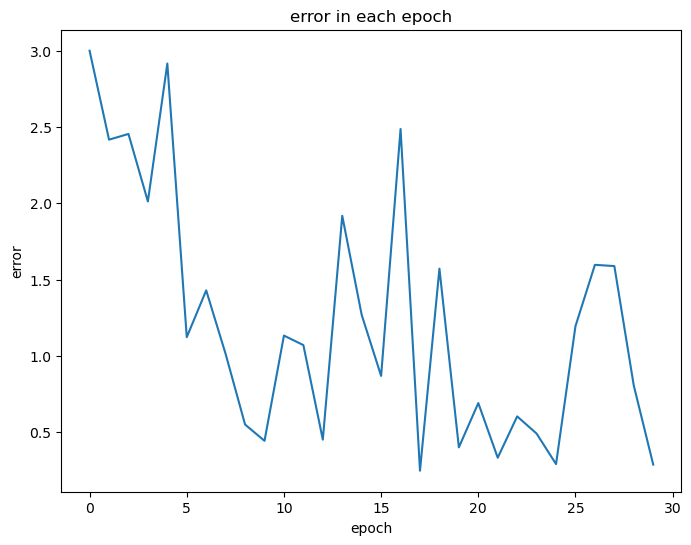

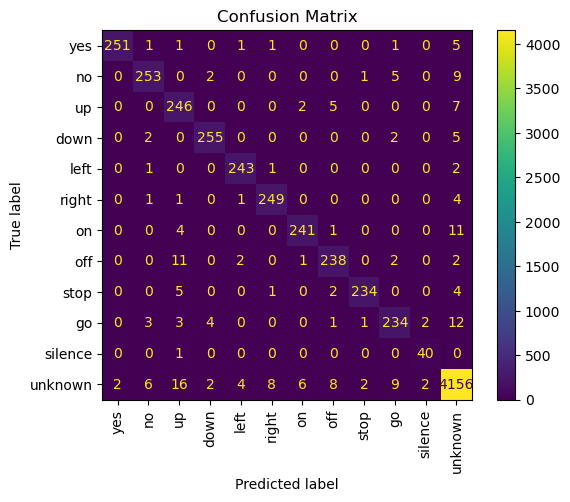

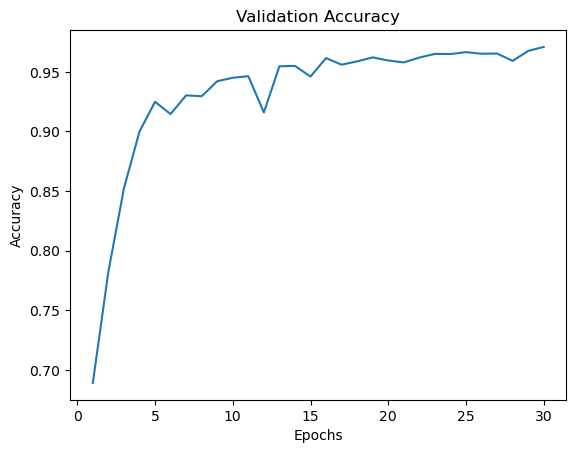

In [14]:
model = perform_test(model = model, 
                     train_data = train_data, 
                     test_data = valid_data, 
                     batch_size = batch_size, 
                     num_epochs = num_epochs, 
                     criterion = criterion, 
                     optimizer = optimizer, 
                     scheduler = scheduler,
                     device = DEVICE,
                     all_classes=classes_index,
                     trans_mode = False,
                     transform = transform)

In [15]:
name = 'inception_aug'
torch.save(model.state_dict(), f'saved_models/{name}.pth')

#### mod2

In [16]:
model = models.InceptionClassifierMod(INPUT_SHAPE, CLASSES_COUNT, num_filters, use_residual, use_bottleneck, depth, kernel_size, bottleneck_size)

model.to(DEVICE)
if DEVICE == torch.device('cuda'):
    model = model.cuda()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = lr, weight_decay = weight_decay)
scheduler = LinearLR(optimizer = optimizer, start_factor = 1.0, end_factor = 0.01, total_iters = num_epochs)

transform = [
    torchaudio.transforms.TimeMasking(time_mask_param = masking_param), 
    torchaudio.transforms.FrequencyMasking(freq_mask_param = masking_param),
    ]

Epoch [1/30], Train loss: 0.0027
Test accuracy: 0.789150460593654
Epoch [2/30], Train loss: 0.0029
Test accuracy: 0.8480772042696301
Epoch [3/30], Train loss: 0.0025
Test accuracy: 0.8607983623336745
Epoch [4/30], Train loss: 0.0017
Test accuracy: 0.9232343909928352
Epoch [5/30], Train loss: 0.0027
Test accuracy: 0.9222108495394064
Epoch [6/30], Train loss: 0.0011
Test accuracy: 0.9207486474630794
Epoch [7/30], Train loss: 0.0017
Test accuracy: 0.9425354584003509
Epoch [8/30], Train loss: 0.0010
Test accuracy: 0.93434712677292
Epoch [9/30], Train loss: 0.0004
Test accuracy: 0.9510162304430473
Epoch [10/30], Train loss: 0.0004
Test accuracy: 0.9502851294048837
Epoch [11/30], Train loss: 0.0008
Test accuracy: 0.9447287615148413
Epoch [12/30], Train loss: 0.0008
Test accuracy: 0.9150460593654043
Epoch [13/30], Train loss: 0.0003
Test accuracy: 0.956865038748355
Epoch [14/30], Train loss: 0.0016
Test accuracy: 0.9581810206170492
Epoch [15/30], Train loss: 0.0013
Test accuracy: 0.9555490568

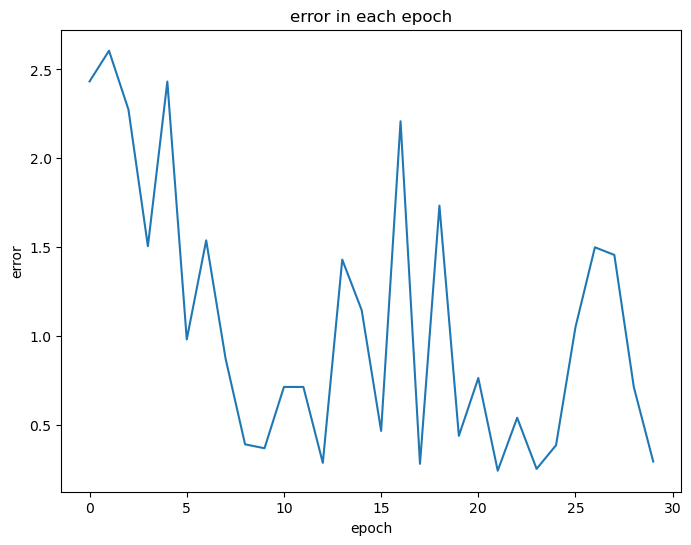

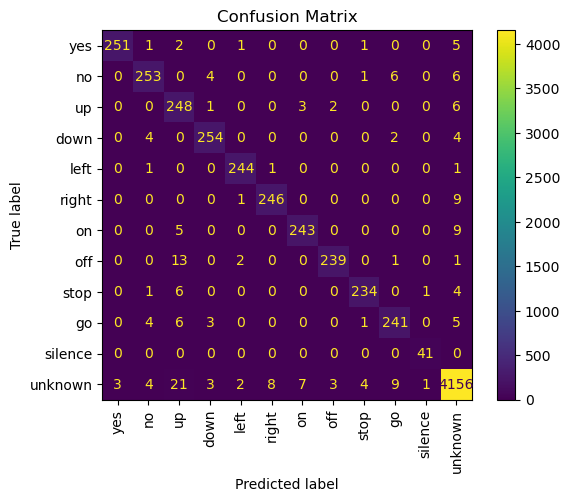

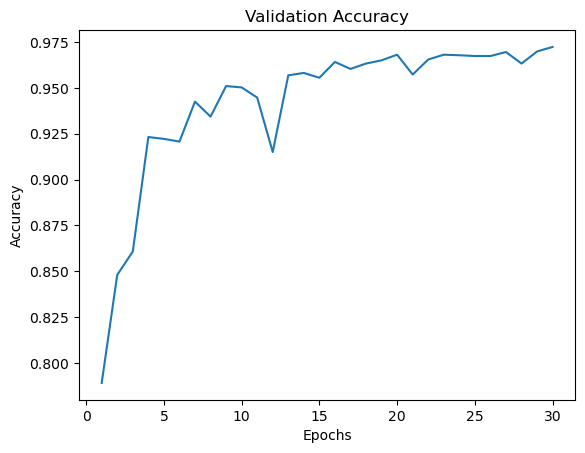

In [17]:
model = perform_test(model = model, 
                     train_data = train_data, 
                     test_data = valid_data, 
                     batch_size = batch_size, 
                     num_epochs = num_epochs, 
                     criterion = criterion, 
                     optimizer = optimizer, 
                     scheduler = scheduler,
                     device = DEVICE,
                     all_classes=classes_index,
                     trans_mode = False,
                     transform = transform)

In [18]:
name = 'inception_mod_aug'
torch.save(model.state_dict(), f'saved_models/{name}.pth')

#### mod3

In [13]:
lr = 0.01

In [14]:
model = models.ConformerClassifier(num_classes = 31, input_length = INPUT_SHAPE[1], input_dim = INPUT_SHAPE[0], num_heads = num_heads, ffn_dim = ffn_dim, num_layers = num_layers, dropout = dropout)

model.to(DEVICE)
if DEVICE == torch.device('cuda'):
    model = model.cuda()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = lr, weight_decay = weight_decay)
scheduler = LinearLR(optimizer = optimizer, start_factor = 1.0, end_factor = 0.01, total_iters = num_epochs)

transform = [
    torchaudio.transforms.TimeMasking(time_mask_param = masking_param), 
    torchaudio.transforms.FrequencyMasking(freq_mask_param = masking_param),
    ]

Epoch [1/30], Train loss: 0.0077
Test accuracy: 0.617195496417605
Epoch [2/30], Train loss: 0.0077
Test accuracy: 0.617195496417605
Epoch [3/30], Train loss: 0.0070
Test accuracy: 0.29887410440122825
Epoch [4/30], Train loss: 0.0078
Test accuracy: 0.159087585904372
Epoch [5/30], Train loss: 0.0067
Test accuracy: 0.38982307354876444
Epoch [6/30], Train loss: 0.0050
Test accuracy: 0.2380464980260272
Epoch [7/30], Train loss: 0.0053
Test accuracy: 0.5240532241555783
Epoch [8/30], Train loss: 0.0047
Test accuracy: 0.617195496417605
Epoch [9/30], Train loss: 0.0028
Test accuracy: 0.5293171516303553
Epoch [10/30], Train loss: 0.0039
Test accuracy: 0.5511039625676268
Epoch [11/30], Train loss: 0.0032
Test accuracy: 0.5870741336452697
Epoch [12/30], Train loss: 0.0044
Test accuracy: 0.6075449627138471
Epoch [13/30], Train loss: 0.0029
Test accuracy: 0.614271092264951
Epoch [14/30], Train loss: 0.0039
Test accuracy: 0.5655797631232636
Epoch [15/30], Train loss: 0.0016
Test accuracy: 0.631232636

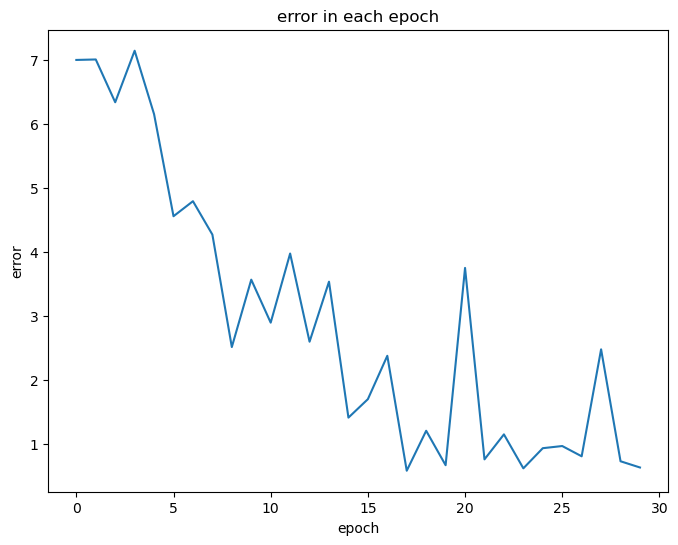

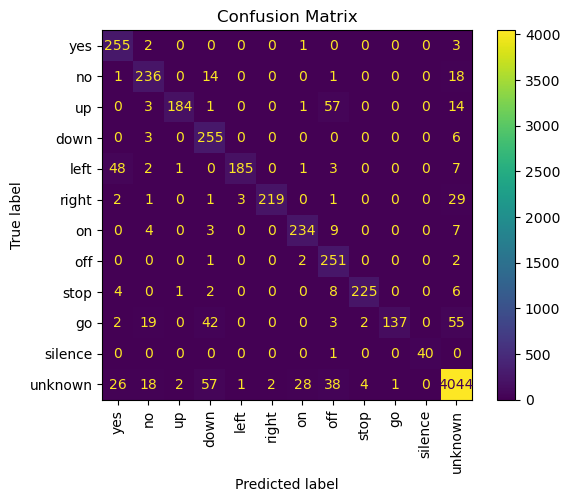

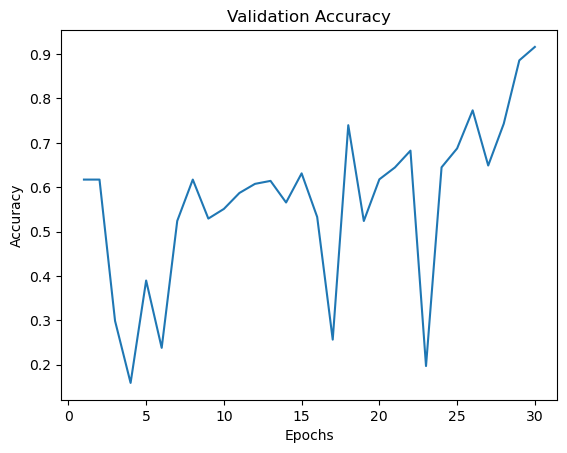

In [15]:
model = perform_test(model = model, 
                     train_data = train_data, 
                     test_data = valid_data, 
                     batch_size = batch_size, 
                     num_epochs = num_epochs, 
                     criterion = criterion, 
                     optimizer = optimizer, 
                     scheduler = scheduler,
                     device = DEVICE,
                     all_classes=classes_index,
                     trans_mode = True,
                     transform = transform)

In [21]:
name = 'conformer_aug'
torch.save(model.state_dict(), f'saved_models/{name}.pth')

## Final test

In [25]:
model_dict = [
    {'model': models.InceptionClassifier(INPUT_SHAPE, CLASSES_COUNT, num_filters, use_residual, use_bottleneck, depth, kernel_size, bottleneck_size), 'path': 'saved_models/inception_aug.pth', 'is_trans': False},
    {'model': models.InceptionClassifierMod(INPUT_SHAPE, CLASSES_COUNT, num_filters, use_residual, use_bottleneck, depth, kernel_size, bottleneck_size), 'path': 'saved_models/inception_mod_aug.pth', 'is_trans': False},
    {'model': models.ConformerClassifier(num_classes = 31, input_length = INPUT_SHAPE[1], input_dim = INPUT_SHAPE[0], num_heads = num_heads, ffn_dim = ffn_dim, num_layers = num_layers, dropout = dropout), 'path': 'saved_models/conformer_aug.pth', 'is_trans': True},
]

              precision    recall  f1-score   support

         yes     0.9960    0.9617    0.9786       261
          no     0.9203    0.9407    0.9304       270
          up     0.8294    0.9538    0.8873       260
        down     0.9511    0.9583    0.9547       264
        left     0.9683    0.9879    0.9780       247
       right     0.9803    0.9727    0.9765       256
          on     0.9719    0.9416    0.9565       257
         off     0.9380    0.9453    0.9416       256
        stop     0.9593    0.9593    0.9593       246
          go     0.9395    0.8962    0.9173       260
     silence     0.8367    1.0000    0.9111        41
     unknown     0.9895    0.9822    0.9859      4221

    accuracy                         0.9708      6839
   macro avg     0.9400    0.9583    0.9481      6839
weighted avg     0.9718    0.9708    0.9710      6839



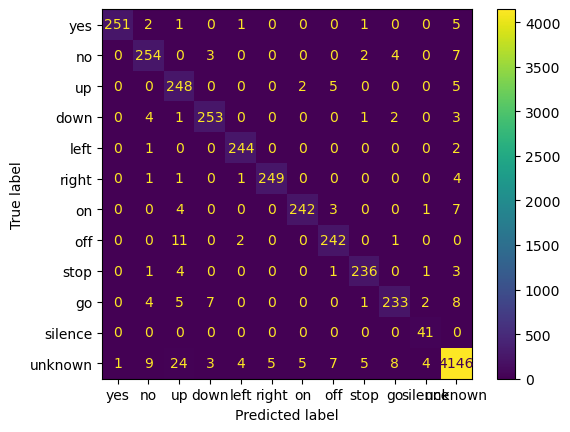

In [26]:
model_list = load_models(model_dict, DEVICE)
_=evaluate_ensemble(model_list, valid_data, DEVICE, classes_index)

## Test single network

In [27]:
from experiments import evaluate_test, CustomDataset

test_dir = r"C:\Users\rafci\Desktop\tensorflow-speech-recognition-challenge\test"
if not os.path.exists(train_dir):
    test_dir = r"C:\Users\jakub\Desktop\PD\sem10\deep\tensorflow-speech-recognition-challenge\test"

X_test = np.load("data/X_test.npy")
X_test = X_test.reshape((-1, X_test.shape[1], X_test.shape[2]))

test_file_names = np.loadtxt('data/test_file_names.npy', dtype=str)


model = models.InceptionClassifierMod(INPUT_SHAPE, CLASSES_COUNT, num_filters, use_residual, use_bottleneck, depth, kernel_size, bottleneck_size).to('cuda')
model.load_state_dict(torch.load('saved_models/inception_aug.pth'))

X_test = X_test
test_dataset = CustomDataset(X_test, test_file_names)


y_pred = evaluate_test(model,test_dataset,DEVICE,classes_index)

print(y_pred)

# TODO - kaggle dodać do experiments Evaluate_test
# wygenerowac pliki dla modeli: 1inception bez mod z aug, 2inception z mod z aug, 3conformer z aug

FileNotFoundError: [Errno 2] No such file or directory: 'data/X_test.npy'

## Test ensemble

In [11]:
model_dict = [
    {'model': models.InceptionClassifier(INPUT_SHAPE, CLASSES_COUNT, num_filters, use_residual, use_bottleneck, depth, kernel_size, bottleneck_size), 'path': 'saved_models/inception_aug.pth', 'is_trans': False},
    {'model': models.InceptionClassifierMod(INPUT_SHAPE, CLASSES_COUNT, num_filters, use_residual, use_bottleneck, depth, kernel_size, bottleneck_size), 'path': 'saved_models/inception_mod_aug.pth', 'is_trans': False},
    {'model': models.ConformerClassifier(num_classes = 31, input_length = INPUT_SHAPE[1], input_dim = INPUT_SHAPE[0], num_heads = num_heads, ffn_dim = ffn_dim, num_layers = num_layers, dropout = dropout), 'path': 'saved_models/conformer_aug.pth', 'is_trans': True},
]
model_list = load_models(model_dict, DEVICE)

In [14]:
from experiments import CustomDataset

test_dir = r"C:\Users\rafci\Desktop\tensorflow-speech-recognition-challenge\test"
if not os.path.exists(train_dir):
    test_dir = r"C:\Users\jakub\Desktop\PD\sem10\deep\tensorflow-speech-recognition-challenge\test"

X_test = np.load("data/X_test.npy")
X_test = X_test.reshape((-1, X_test.shape[1], X_test.shape[2]))

test_file_names = np.loadtxt('data/test_file_names.npy', dtype=str)



test_dataset = CustomDataset(X_test, test_file_names)


evaluate_ensemble_test(model_list,test_dataset,DEVICE,classes_index)


# TODO - kaggle dodać do experiments Evaluate_test
# wygenerowac pliki dla modeli: 1inception bez mod z aug, 2inception z mod z aug, 3conformer z aug